# 1. Introducció

*League of Legends* (LoL) és un videojoc d’estratègia en equip i un dels esports electrònics més jugats del món.  
Cada partida enfronta **dos equips de cinc jugadors**, que competeixen per destruir la base rival i aconseguir diversos objectius estratègics pel camí.

Abans de començar, cada jugador —anomenat *invocador*— escull un **campió** d’entre més de 140 personatges, cadascun amb habilitats i rols diferents (guerrer, mag, suport, assassí, etc.).  
Durant la partida, els equips han d’obtenir **objectius clau** (torres, dracs, barons...) que proporcionen avantatges significatius i poden canviar el ritme del joc.

Aquesta gran quantitat d’informació genera un escenari ideal per a l’anàlisi de dades.  
Les estadístiques de la partida (objectius assolits, or acumulat, baixes, duració, composició de campions...) contenen patrons que permeten entendre **per què un equip guanya o perd**.

En aquest projecte treballem amb dades extretes de **Kaggle**, provinents del conjunt *League of Legends Ranked Games*, que inclou desenes de milers de partides competitives amb estadístiques detallades.

L’objectiu és construir un **model predictiu capaç d’estimar quin equip guanyarà** una partida a partir de les seves estadístiques i de la composició dels campions seleccionats.  
A més, utilitzarem aquest procés per analitzar **quins factors del joc tenen més influència real** en la victòria d’un equip dins d’un entorn tan complex i dinàmic com *League of Legends*.


# 2. Introducció al joc

Per entendre els passos seguits en el desenvolupament del model predictiu, és important conèixer els **elements principals del joc** i com aquests es reflecteixen en les dades.

## 2.1 Campions

Els **campions** són els personatges que controlen els jugadors.  
N’hi ha més de 140, cadascun amb habilitats úniques i un **rol** diferent (mag, suport, tirador, assassí, etc.).

A mesura que el joc evoluciona mitjançant actualitzacions (anomenades *parches*), els campions poden guanyar o perdre força (*buffs* i *nerfs*).  
Això provoca que cada campió tingui un **rendiment històric diferent**, sovint mesurat en forma de *winrate* (percentatge de victòries).

En aquest projecte, aquesta informació s’incorpora mitjançant tècniques d’*encoding*, que permeten al model interpretar la qualitat de la **composició de campions** de cada equip.

## 2.2 Objectius de la partida

El propòsit final de LoL és destruir el **Nexe (Nexus)** de l’equip rival.  
Per fer-ho, els equips han d’avançar per les línies i aconseguir diversos objectius:

### • Nexus
Estructura principal de la base. Quan un equip el destrueix, guanya la partida.  
Representat a les dades per la variable **`winner`**.

### • Inhibidors
Estructures internes de la base que, en ser destruïdes, debiliten la defensa rival.  
Columnes: **`*_firstinhib`**, **`*_inhibkills`**.

### • Torres
Estructures defensives situades a les línies.  
Columnes: **`*_firsttower`**, **`*_towerkills`**.

### • Herald del Rift
Monstre èpic inicial que ajuda a pressionar torres.  
Columnes: **`*_firstharry`**, **`*_harrykills`**.

### • Dracs
Monstres que atorguen millores permanents a l’equip.  
Columnes: **`*_firstdragon`**, **`*_dragonkills`**.

### • Baró Nashor
El monstre més poderós, que proporciona un avantatge decisiu.  
Columnes: **`*_firstbaron`**, **`*_baronkills`**.

## 2.3 Factors estratègics i tàctics

El joc combina dos tipus d’elements:

- **Estratègics:** objectius aconseguits, ritme de la partida, control del mapa.
- **Tàctics:** composició de campions i sinergies entre ells.

El nostre model utilitza tots aquests factors per analitzar i predir **quin equip té més probabilitat de guanyar**.


## Predicció de l’equip guanyador a *League of Legends*

Aquest projecte utilitza un conjunt de **7 datasets** del joc *League of Legends (LoL)* amb l’objectiu de **predir quin equip guanyarà una partida** a partir de les seves estadístiques i la composició dels campions.

### Datasets originals i finalitat

1. **matches.csv**  
   Conté informació general de cada partida (durada, versió, temporada...).

2. **teamstats.csv**  
   Estadístiques a nivell d’equip: nombre de torres, dracs, barons, inhibidors, etc.

3. **teambans.csv**  
   Llista dels campions que cada equip ha prohibit (*bans*).  
   *(No s’utilitza al model principal, però podria servir per a anàlisis futures).*

4. **participants.csv**  
   Detalla els jugadors i els campions utilitzats a cada partida (10 per partida).

5. **stats1.csv / stats2.csv**  
   Contenen estadístiques individuals de cada jugador (kills, morts, or guanyat, minions, etc.).  
   Es combinen per tenir tots els jugadors.

6. **champs.csv**  
   Llista de campions disponibles (nom i identificador).


### Com s’han combinat

1. S’han unit `matches`, `teamstats`, `stats1` i `stats2` per crear un dataset amb estadístiques **per partida i equip** (`lol_clean.csv`).

2. Després s’ha afegit informació de **composició de campions** a través de `participants` i `champs`, aplicant un **Target Encoding** que resumeix la força mitjana dels campions de cada equip sense generar milers de columnes.

3. El resultat final és `lol_final.csv`, amb una fila per partida i columnes per a cada equip (`blue_*` i `red_*`), més la variable objectiu `winner`.

### Objectiu
Predir la variable:
> `winner` → 1 si guanya l’equip blau, 0 si guanya l’equip vermell

a partir de:
- Estadístiques de la partida (kills, or, objectius...)  
- Característiques derivades de la composició (mitjana i dispersió del rendiment dels campions)



## Com s’ha generat el dataset final `lol_final.csv`

Per arribar al dataset final amb què treballarem, hem combinat i processat **tots els fitxers originals** del conjunt de dades de *League of Legends*.

### Integració de dades bàsiques
Primer hem combinat els arxius principals (`matches`, `teamstats`, `stats1`, `stats2`, `participants`, `champs`) per construir un dataset amb **una fila per partida**, on cada equip (blau i vermell) té les seves estadístiques.

- S’han unit les dades dels **jugadors** amb les seves **estadístiques individuals** (`stats1` i `stats2`), i posteriorment s’han agregat a nivell d’equip (suma de kills, or, assistències, etc.).
- S’ha inferit l’equip de cada jugador (`teamid=100` per al blau, `200` per al vermell) a partir del número de jugador.
- S’han afegit els **objectius d’equip** (torres, dracs, barons...) des de `teamstats` i la **informació de la partida** (`durada`, `versió`, `temporada`) des de `matches`.
- Finalment, s’han combinat les estadístiques de l’equip blau i de l’equip vermell en una sola fila i s’ha creat la variable **`winner`**, que val 1 si guanya l’equip blau i 0 si guanya el vermell.

El resultat d’aquest procés és el fitxer `lol_clean.csv`, amb totes les estadístiques bàsiques de cada partida.

### Afegir informació sobre la composició d’equips
A continuació, s’ha enriquit el dataset amb informació sobre **els campions seleccionats** a cada partida, utilitzant `participants.csv`.

Per no crear milers de columnes (una per campió), s’ha aplicat un mètode de **Target Encoding**:
- S’ha calculat el **winrate mitjà de cada campió** (probabilitat de victòria històrica).
- Per a cada equip s’ha agregat el rendiment mitjà, màxim, mínim i desviació estàndard dels cinc campions triats.
- S’han afegit també les diferències entre els valors mitjans del blau i del vermell.

Això genera noves variables com `blue_te_mean`, `red_te_max` o `te_mean_diff`, que representen la **força estimada de la composició de cada equip**.

El resultat final és el fitxer **`lol_final.csv`**, que conté:
- Les estadístiques generals de partida (`lol_clean.csv`)
- + Les característiques de composició d’equip (Target Encoding)
- + La variable objectiu `winner`

Aquest fitxer és el que utilitzarem per fer l’anàlisi exploratòria i entrenar els models de predicció.


# 3. Dependències

Abans de començar l’anàlisi de dades, incorporem les llibreries principals que utilitzarem en el projecte. Cada una d’elles té un paper específic en el processament, visualització i modelatge de les dades.

**Pandas**: operador principal per a la càrrega, manipulació i transformació de dades en taules.  
**NumPy**: suport per a operacions numèriques i vectors eficients.  
**Seaborn i Matplotlib**: creació de gràfics i visualitzacions estadístiques.  
**Scikit-learn**: divisió en conjunts de Train/Test, mètriques i models de classificació.  
**XGBoost**: model de gradient boosting d’alt rendiment.  

A continuació, importem totes les dependències necessàries per treballar amb el dataset `lol_final.csv`.

In [113]:
import pandas as pd
import numpy as np

# Visualització
import matplotlib.pyplot as plt
import seaborn as sns

# Models i avaluació
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Altres
import warnings
warnings.filterwarnings("ignore")

# 4. Exploració de les dades (Data exploration)

Abans de començar l’anàlisi detallada i la construcció del model predictiu, és essencial **familiaritzar-nos amb el conjunt de dades** amb què treballarem.  
Conèixer la seva estructura, el nombre de files, les columnes disponibles i la naturalesa de la informació ens ajudarà a prendre millors decisions durant tot el procés.

En aquest projecte utilitzem el fitxer **`lol_final.csv`**, que és el resultat d’un procés previ d’integració i neteja de dades.  
A partir de diversos fitxers originals del conjunt *League of Legends Ranked Games* (participants, estadístiques d’equips, objectius, campions, etc.), s’ha construït un únic DataFrame on **cada fila representa una partida**.

Aquest fitxer final inclou informació agregada sobre:

- **estadístiques bàsiques dels equips**,  
- **objectius aconseguits** (torres, dracs, barons, etc.),  
- **rendiment econòmic i de combat**,  
- **característiques de la composició de campions**, modelades mitjançant *target encoding*,  
- i finalment, la variable objectiu **`winner`**, que val:
  - `1` si guanya l’equip blau (blue team),
  - `0` si guanya l’equip vermell (red team).

Comencem carregant el dataset i observant-ne les dimensions per obtenir una primera impressió del volum de dades amb què treballarem.


In [114]:
df = pd.read_csv('data/lol_final.csv')

print("Nombre total de files:", df.shape[0])
print("Nombre total de columnes:", df.shape[1])


Nombre total de files: 184069
Nombre total de columnes: 60


Com podem veure, el dataset és força complet i conté informació detallada de moltes partides, així com múltiples característiques generades a partir dels equips i dels jugadors.  

Un cop sabem la mida del dataset, podem observar algunes files com a exemple per entendre millor quina mena d’informació inclou.


In [115]:
pd.set_option('display.max_columns', None)
df.head(5)


,blue_matchid,blue_teamid_x,blue_firstblood,blue_firsttower,blue_firstinhib,blue_firstbaron,blue_firstdragon,blue_firstharry,blue_towerkills,blue_inhibkills,blue_baronkills,blue_dragonkills,blue_harrykills,blue_kills,blue_deaths,blue_assists,blue_goldearned,blue_totminionskilled,blue_team_win,blue_gameid,blue_seasonid,blue_duration,blue_version,red_teamid_x,red_firstblood,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills,red_kills,red_deaths,red_assists,red_goldearned,red_totminionskilled,red_team_win,red_seasonid,red_duration,red_version,winner,blue_teamid_y,blue_te_mean,blue_te_max,blue_te_min,blue_te_std,red_matchid,red_teamid_y,red_te_mean,red_te_max,red_te_min,red_te_std,te_mean_diff,te_max_diff,te_min_diff,te_std_diff
0,10,100,0,1,0,0,0,0,5,0,0,0,0,20.0,39.0,22.0,55574.0,663.0,0.0,3187427022,8,1909,7.10.187.9675,200,1,0,1,1,1,1,10,3,1,3,1,39.0,20.0,56.0,67965.0,661.0,1.0,8,1909,7.10.187.9675,0,100.0,0.507443,0.524503,0.482524,0.017070,10.0,200.0,0.513354,0.532189,0.492475,0.014869,-0.005911,-0.007686,-0.009951,0.002201
1,11,100,1,0,0,0,0,0,2,0,0,0,0,33.0,32.0,34.0,54526.0,587.0,0.0,3187425281,8,1693,7.10.187.9675,200,0,1,1,0,1,0,10,3,0,2,0,32.0,33.0,29.0,59706.0,648.0,1.0,8,1693,7.10.187.9675,0,100.0,0.501231,0.516650,0.481677,0.015323,11.0,200.0,0.504884,0.519634,0.488710,0.011474,-0.003653,-0.002984,-0.007033,0.003849
2,12,100,1,0,0,0,0,0,1,0,0,0,0,20.0,32.0,27.0,40842.0,395.0,0.0,3187269801,8,1482,7.10.187.9675,200,0,1,1,0,1,0,11,3,0,2,0,32.0,20.0,41.0,53872.0,499.0,1.0,8,1482,7.10.187.9675,0,100.0,0.513243,0.529427,0.495772,0.015370,12.0,200.0,0.516069,0.532041,0.505212,0.012012,-0.002826,-0.002614,-0.009441,0.003358
3,13,100,1,1,0,0,1,1,6,0,0,2,1,36.0,39.0,38.0,63631.0,699.0,0.0,3187252065,8,1954,7.10.187.9675,200,0,0,1,1,0,0,9,2,1,2,0,39.0,36.0,48.0,66748.0,541.0,1.0,8,1954,7.10.187.9675,0,100.0,0.482963,0.522779,0.459867,0.028191,13.0,200.0,0.487695,0.517956,0.459533,0.021805,-0.004732,0.004823,0.000334,0.006386
4,14,100,1,0,0,0,0,1,5,0,0,0,1,38.0,35.0,55.0,62620.0,683.0,0.0,3187201038,8,2067,7.10.187.9675,200,0,1,1,1,1,0,7,1,1,3,0,33.0,39.0,45.0,68135.0,759.0,1.0,8,2067,7.10.187.9675,0,100.0,0.495498,0.510979,0.463535,0.018473,14.0,200.0,0.504733,0.520145,0.483393,0.013803,-0.009235,-0.009167,-0.019858,0.004669


El nostre dataset `lol_final.csv` conté una fila per cada partida de *League of Legends*.  
Cada partida inclou **informació detallada dels dos equips** (blau i vermell), així com un conjunt ampli de característiques que descriuen tant el desenvolupament del joc com la composició dels campions.

Tot i que els noms de les columnes són tècnics, podem entendre-les de manera senzilla agrupant-les per categories.

A continuació descrivim tots els tipus de variables que apareixen al dataset.

## 4.1. Informació general de la partida
Aquestes columnes descriuen dades bàsiques i de context:

- `blue_matchid`, `red_matchid`: identificadors únics de la partida (un per equip).
- `blue_gameid`: identificador intern de la base de dades del joc.
- `blue_seasonid`, `red_seasonid`: temporada en què s’ha jugat.
- `blue_version`, `red_version`: versió del joc (LoL rep actualitzacions constants).
- `blue_duration`, `red_duration`: durada de la partida en segons.

Aquestes variables no mesuren rendiment, però situen la partida dins del seu context temporal.

## 4.2. Esdeveniments inicials (primer objectiu aconseguit)
Indiquen quin equip ha estat el primer a aconseguir un objectiu important.  
A LoL, aconseguir un objectiu en primer lloc sol donar un avantatge competitiu.

Exemples:

- `*_firstblood`: primera baixa.
- `*_firsttower`: primera torre destruïda.
- `*_firstdragon`: primer drac derrotat.
- `*_firstbaron`: primer Baró Nashor.
- `*_firstharry`: primer Herald del Rift.
- `*_firstinhib`: primer inhibidor destruït.

Totes aquestes variables són binàries (0 = no, 1 = sí).

## 4.3. Nombre total d’objectius aconseguits
Aquestes columnes indiquen **quants objectius ha aconseguit cada equip** durant tota la partida:

- `*_towerkills`: torres destruïdes.
- `*_inhibkills`: inhibidors destruïts.
- `*_dragonkills`: dracs eliminats.
- `*_baronkills`: barons derrotats.
- `*_harrykills`: heralds eliminats.

Com més objectius acumula un equip, més opcions té de controlar el mapa i, sovint, de guanyar.

## 4.4. Rendiment en combat i economia
Són estadístiques bàsiques que descriuen el comportament de l’equip durant la partida:

- `*_kills`: baixes aconseguides.
- `*_deaths`: morts patides.
- `*_assists`: assistències.
- `*_goldearned`: or total obtingut.
- `*_totminionskilled`: nombre de minions eliminats.

Aquestes mesures reflecteixen la força econòmica i de combat de cada equip.

## 4.5. Informació sobre la composició dels campions (*Target Encoding*)
La composició de campions és una part fonamental de l’estratègia a LoL.  
Cada equip escull 5 campions, però en lloc de crear més de 140 columnes (una per campió), utilitzem un **target encoding** que resumeix el rendiment històric dels campions escollits.

Les principals característiques calculades són:

- `*_te_mean`: rendiment mitjà dels 5 campions utilitzats.
- `*_te_max`: campió amb millor rendiment històric.
- `*_te_min`: campió amb pitjor rendiment històric.
- `*_te_std`: variabilitat (si tots els campions tenen força similar o no).

També calculem diferències entre equips:

- `te_mean_diff`: diferència entre la força mitjana del blau i del vermell.
- `te_max_diff`, `te_min_diff`, `te_std_diff`: diferències equivalents per a cada mesura.

Aquestes variables resumeixen la **qualitat de la composició d’equip**, un factor clau per determinar la probabilitat de victòria.

## 4.6. Etiqueta final (variable objectiu)

- `winner`: variable objectiu del nostre model.  
  - Valor `1` → guanya l’equip blau.  
  - Valor `0` → guanya l’equip vermell.

Aquesta és la resposta real de cada partida i allò que el nostre model intentarà predir.

Amb aquesta descripció ja tenim una visió clara del contingut del dataset i podem començar a explorar estadístiques, correlacions i patrons que ens ajudaran a entendre quins factors influeixen més en la victòria d’un equip.


# 5. Anàlisi de les dades (Data Anaysis)

Un cop ens hem familiaritzat amb l’estructura del nostre dataset, el següent pas és **analitzar numèricament les variables** per entendre millor què està passant a les partides.

L’objectiu d’aquest apartat és:
- veure valors típics i extrems (mínim, màxim, mitjana)  
- entendre quines variables semblen més relacionades amb la victòria  
- començar a intuir quines característiques poden ser útils per entrenar el model

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blue_matchid,184069.0,9.505275e+04,5.359191e+04,1.000000e+01,4.878200e+04,9.506800e+04,1.415630e+05,1.875880e+05
blue_teamid_x,184069.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
blue_firstblood,184069.0,5.072772e-01,4.999484e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blue_firsttower,184069.0,5.026376e-01,4.999944e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blue_firstinhib,184069.0,4.703236e-01,4.991199e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstbaron,184069.0,3.047118e-01,4.602865e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstdragon,184069.0,4.763540e-01,4.994419e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstharry,184069.0,2.352705e-01,4.241689e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
blue_towerkills,184069.0,5.878948e+00,3.826615e+00,0.000000e+00,2.000000e+00,6.000000e+00,9.000000e+00,1.600000e+01
blue_inhibkills,184069.0,1.065915e+00,1.270308e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01


La taula de `describe()` ens dona, per a cada columna numèrica:

- **count**: quantes files tenen valor (nombre de partides).  
- **mean**: la mitjana.  
- **std** (desviació estàndard): com de dispersos estan els valors respecte la mitjana.  
- **min / max**: valor mínim i màxim observat.  
- **25%, 50%, 75%**: percentils (valors típics baixos, medians i alts).

Encara que hi hagi força números, podem extreure algunes idees senzilles:

- Hi ha variables que només poden valdre **0 o 1** (per exemple, `blue_firstdragon`), perquè indiquen si un equip ha aconseguit un objectiu o no.  
- Altres variables són **comptadors** (per exemple, `blue_towerkills`, `red_dragonkills`), que ens diuen quants objectius s’han aconseguit.  
- També hi ha variables **contínues** com `blue_duration` o `blue_goldearned`, que poden prendre molts valors possibles i ens parlen de quant de temps ha durat la partida o de quants recursos ha acumulat l’equip.

En general, les variables amb més variabilitat (desviació estàndard alta) acostumen a ser més informatives que aquelles que pràcticament no canvien.

## 5.1. Tipus de variables del dataset

Abans de continuar amb l’anàlisi, és important identificar quins tipus de variables conté el nostre dataset.  
Com que la informació prové de diferents arxius i captura aspectes diversos d’una partida de League of Legends, trobarem atributs de naturaleses molt diferents.  
En aquest apartat descriurem breument cada grup de variables per entendre millor què representa cadascuna i com ens poden ajudar en la predicció del guanyador.

### 5.1.1. Variables Contínues

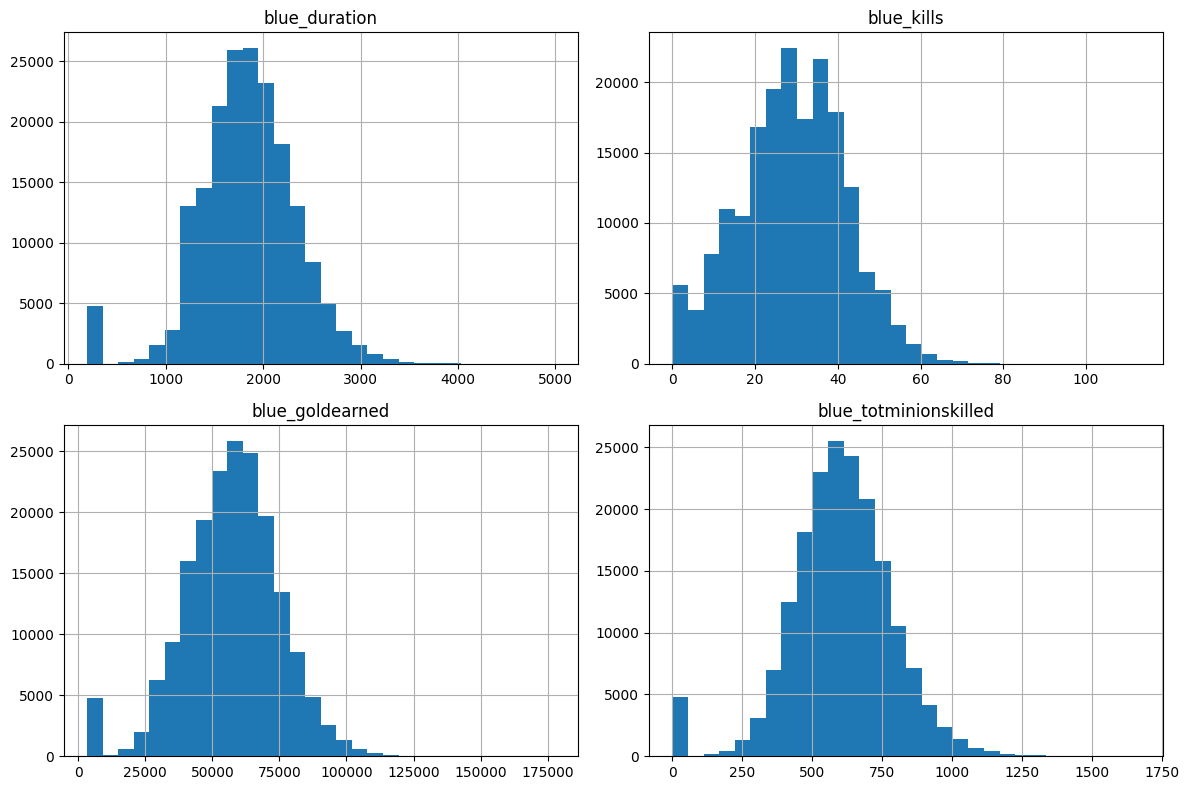

In [117]:
continuous_vars = ['blue_duration', 'blue_kills', 'blue_goldearned', 'blue_totminionskilled']

df[continuous_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les variables contínues (duració, kills, or i minions)

Ara analitzem un altre tipus de variables: les **variables contínues**, que poden prendre molts valors diferents i que descriuen el ritme i la intensitat d’una partida.  
En aquest cas, ens fixem en quatre mesures bàsiques del desenvolupament del joc:

- `blue_duration`: quant ha durat la partida.
- `blue_kills`: quantes baixes ha aconseguit l’equip blau.
- `blue_goldearned`: quina quantitat total d’or ha acumulat.
- `blue_totminionskilled`: quants minions ha eliminat.

A les gràfiques s’observen patrons molt clars:

- Com més llarga és una partida, **més kills** hi acostuma a haver.  
- Si hi ha més kills i més temps de joc, també augmenta **l’or guanyat**.  
- Els minions apareixen constantment, així que en partides llargues també n’hi ha més disponibles per eliminar.

També es detecta un detall important:  
hi ha un grup de partides **molt curtes**, al voltant dels 3 minuts.  
Aquestes partides tan breus són casos especials en què un jugador abandona i l’equip decideix **rendirse immediatament** per no perdre el temps.  
Això explica els valors molt baixos en kills, or i minions associats a aquestes partides.

Encara que aquestes variables siguin contínues, són molt útils perquè:

- descriuen el flux natural d’una partida,
- mostren forta relació entre elles,
- i ajuden a identificar comportaments anòmals.

Més endavant veurem com aquestes tendències es relacionen amb el resultat final (`winner`) i com poden ajudar-nos a construir el model de predicció.

### 5.1.2. Variables Discretes

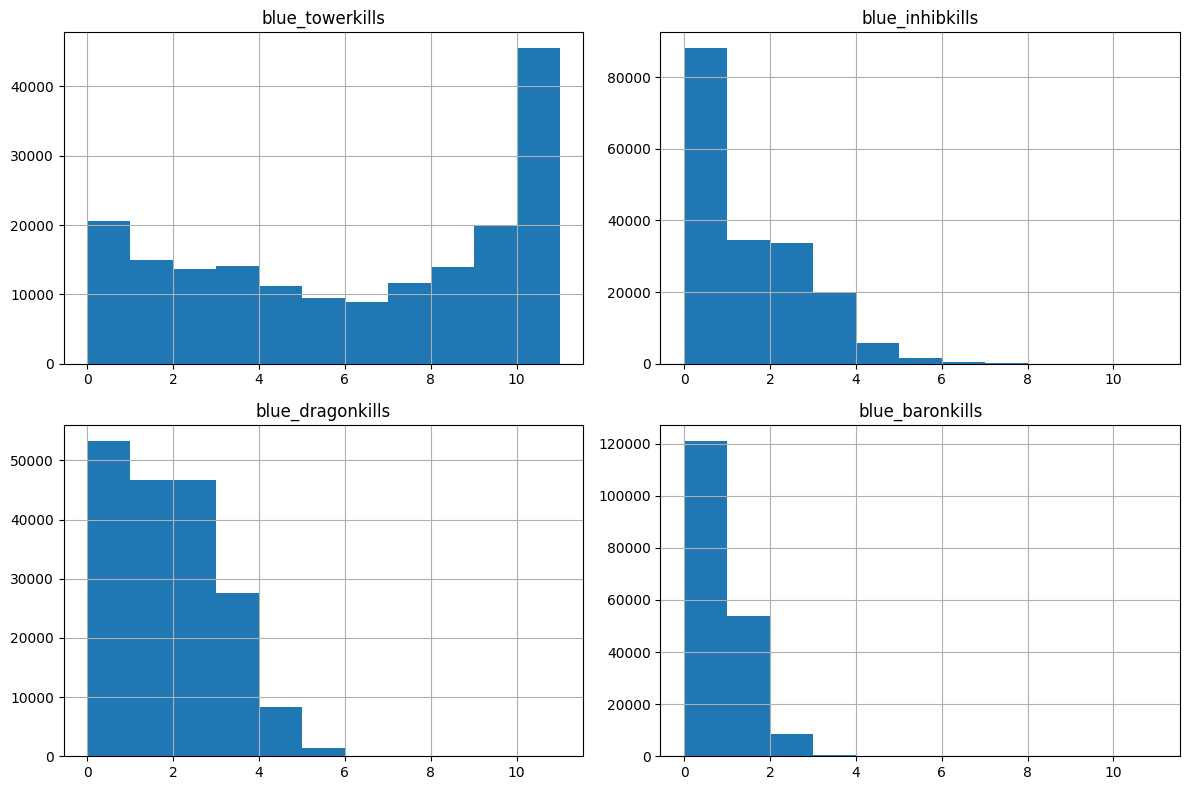

In [118]:
discrete_vars = ['blue_towerkills', 'blue_inhibkills', 'blue_dragonkills', 'blue_baronkills']

df[discrete_vars].hist(figsize=(12, 8), bins=range(0, 12))
plt.tight_layout()
plt.show()

### Anàlisi de les variables discretes (objectius)

Ara mirem un altre tipus de variables: els **objectius** que aconsegueix l’equip blau durant la partida.  
Són comptadors, és a dir, només poden tenir **nombres enters petits** (0, 1, 2, 3...).

Les quatre variables que hem representat són:

- `blue_towerkills`: quantes torres enemigues ha destruït l’equip blau.
- `blue_inhibkills`: quants inhibidors ha destruït.
- `blue_dragonkills`: quants dracs ha matat.
- `blue_baronkills`: quants barons ha matat.

A les gràfiques es veu clar que:

- La majoria de partides tenen **pocs objectius** (per exemple, 0 o 1 baró, 0–3 dracs).  
- Només en unes quantes partides l’equip blau aconsegueix molts objectius.

Té sentit: barons i dracs són enemics forts que no apareixen sovint, i no totes les partides duren prou o estan prou igualades com perquè es facin molts.

Encara que aquestes variables siguin discretes, són molt importants perquè:
- com més objectius aconsegueix un equip,
- més avantatge té,
- i per tant, és més probable que acabi guanyant la partida.

Més endavant veurem com aquests comptadors d’objectius es relacionen amb la variable `winner`.

### 5.1.3. Variables binàries

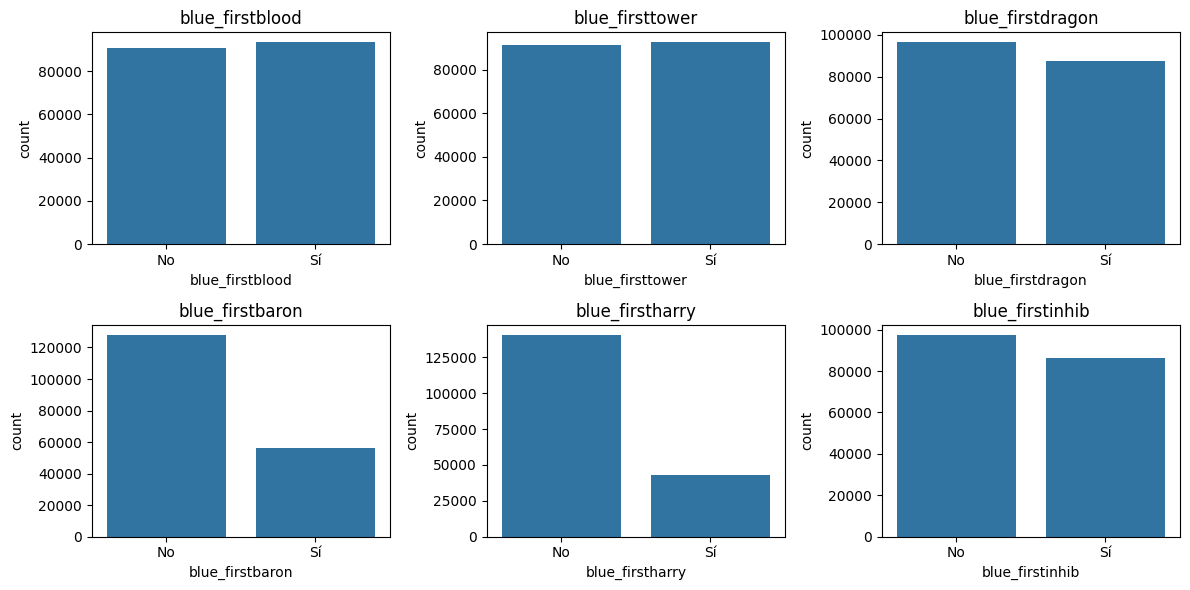

In [119]:
binary_vars = [
    'blue_firstblood', 'blue_firsttower', 'blue_firstdragon',
    'blue_firstbaron', 'blue_firstharry', 'blue_firstinhib'
]

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(binary_vars):
    sns.countplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(['No', 'Sí'])

plt.tight_layout()
plt.show()

### Anàlisi de les variables binàries (primers objectius)

Ara analitzem un altre grup de variables molt importants: les **variables binàries**, que només poden tenir dos valors possibles (0 o 1).  
Aquestes variables indiquen si l’equip blau ha estat **el primer** en aconseguir un objectiu determinat de la partida.

Les variables que hem representat són:

- `blue_firstblood`: si l’equip blau ha fet la primera baixa.
- `blue_firsttower`: si ha destruït la primera torre.
- `blue_firstdragon`: si ha matat el primer drac.
- `blue_firstbaron`: si ha matat el primer baró.
- `blue_firstharry`: si ha matat el primer Herald.
- `blue_firstinhib`: si ha destruït el primer inhibidor.

Aquestes variables són molt simples:  
- **1** significa que l’equip blau ha estat el primer a obtenir l’objectiu.  
- **0** significa que no ho ha estat (per tant, ho ha fet l’equip vermell).

Quan observem les gràfiques, veiem que en molts casos els valors 0 i 1 estan relativament equilibrats, cosa que indica que **qualsevol equip pot aconseguir aquests primers objectius**.

A més, aquests primers esdeveniments tenen sovint un impacte directe en el desenvolupament del partit. Per exemple:

- Fer la **primera baixa** pot donar avantatge inicial.
- Enderrocar la **primera torre** dona més control del mapa.
- Matar el **primer drac** o el **primer baró** pot donar estadístiques extra.
- Destruir el **primer inhibidor** pot crear pressió constant amb minions més forts.

Encara que aquestes variables només indiquin si un equip ho ha fet “primer”, són molt útils perquè:
- representen moments clau del joc,
- solen coincidir amb equips que van per davant,
- i sovint tenen relació amb la probabilitat de victòria.

Més endavant veurem com aquestes accions inicials s’associen amb `winner` i fins a quin punt influeixen en el resultat final.

### 5.1.4.Variables de composició

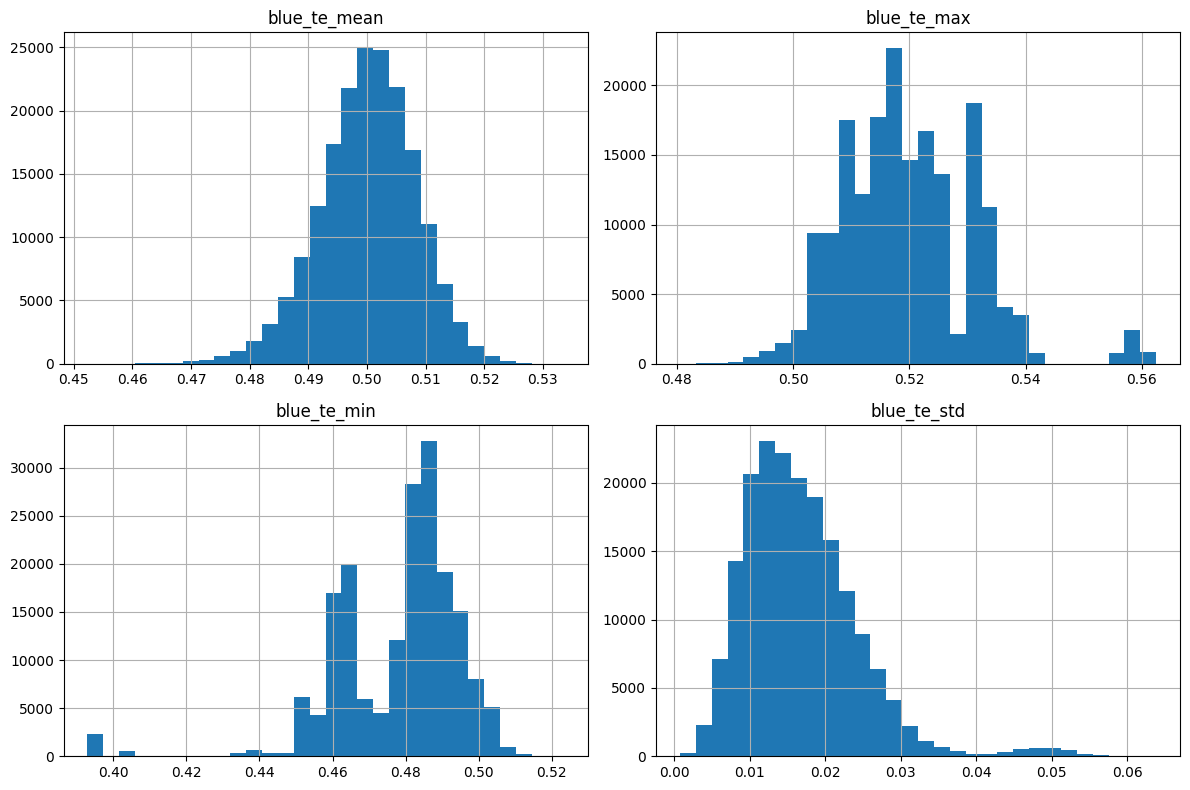

In [120]:
composition_vars = ['blue_te_mean', 'blue_te_max', 'blue_te_min', 'blue_te_std']

df[composition_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les variables de composició dels campions (Target Encoding)

Aquestes variables descriuen la **força històrica** dels campions que utilitza cada equip.  
Com que cada partida té cinc campions per equip i no volem crear centenars de columnes (una per campió), utilitzem una tècnica anomenada **target encoding**, que converteix cada campió en un valor numèric que representa la seva eficàcia històrica.

Les variables de composició són:

- `te_mean`: força mitjana dels 5 campions de l’equip  
- `te_max`: campió més fort de l’equip  
- `te_min`: campió menys eficient  
- `te_std`: variabilitat entre els 5 campions (si tots són forts o alguns molt dèbils)

Observant les gràfiques, veiem que:

- Tant l’equip blau com el vermell tenen distribucions molt semblants, cosa que indica **equilibri** entre equips.
- Els valors són relativament compactes (entre 0.4 i 0.65 aproximadament), ja que els winrates de campions acostumen a estar acotats.
- Hi ha equips amb composicions molt homogènies (`te_std` baix) i d’altres amb combinacions més extremes (`te_std` alt).

Aquestes variables ens ajuden a capturar la idea que **algunes composicions d’equip tenen més probabilitat de guanyar** que altres.

###  5.1.5. Variables de les diferències entre equips

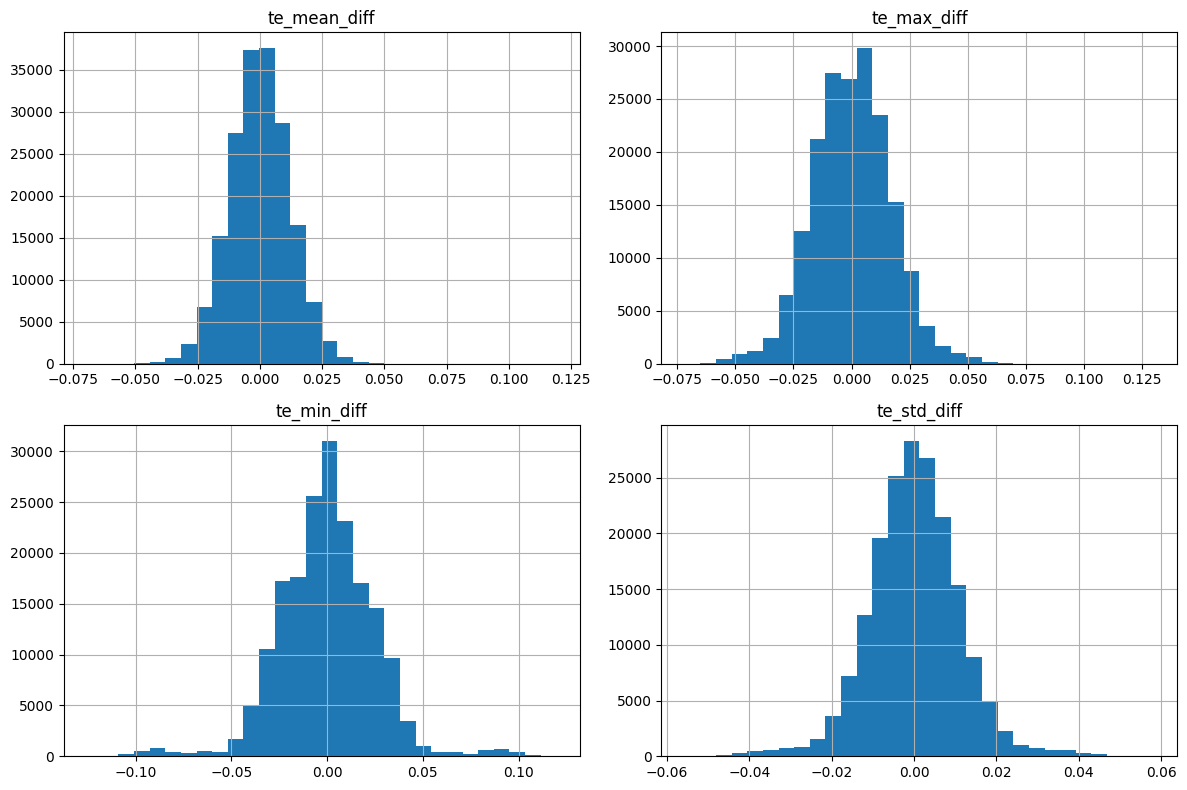

In [121]:
diff_vars = ['te_mean_diff', 'te_max_diff', 'te_min_diff', 'te_std_diff']

df[diff_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les diferències entre equips

A més d’avaluar la composició de cada equip per separat, també podem calcular la **diferència directa entre l’equip blau i el vermell**.  
Això ens permet saber quin equip parteix amb una composició “més forta” segons els seus campions.

Les variables de diferència són:

- `te_mean_diff`: diferència entre la força mitjana del blau i la del vermell  
- `te_max_diff`: diferència entre els campions més forts  
- `te_min_diff`: diferència entre els més dèbils  
- `te_std_diff`: diferència en variabilitat de composició

Si aquestes diferències són positives, l’equip blau té (en teoria) campions més forts.  
Si són negatives, passa el contrari.

Les gràfiques mostren:

- Distribucions centrades molt a prop del **0**, cosa que indica que moltes partides tenen composicions equilibrades.
- Alguns casos on un equip té una composició clarament més forta que l’altre.

Aquestes diferències són especialment útils pel model perquè ens indiquen **quin equip té avantatge abans que comenci la partida**.

## 5.2. Un nou aspecte clau en la predicció: la fase del joc i el comportament dels campions

En *League of Legends*, el rendiment d’un campió no és constant durant tota la partida.  
Hi ha campions que són molt potents a l’**early game** (com Renekton o Elise), mentre que d’altres només esdevenen realment forts al **late game** (com Kayle, Kassadin o Vayne).

Fins aquest punt del projecte disposàvem de:

- estadístiques finals de cada partida,
- informació agregada d’equip,
- *target encodings* globals per campió (rendiment mitjà),
- i la variable objectiu `winner`.

Tot i això, faltava una peça fonamental:

> **No teníem en compte com varia la força d’un campió segons el moment de la partida.**

Per això introduïm una nova dimensió temporal al nostre model:

### Objectiu d’aquesta secció

1. **Classificar cada partida segons la seva duració** (early, mid o late).
2. **Calcular el rendiment històric dels campions per fase**, utilitzant *target encoding* OOF.
3. **Agregarem aquest rendiment a nivell d’equip** en forma de mitjana, mínim, màxim i variància.
4. **Aplicarem un multiplicador suau basat en la duració real de la partida**, de manera que:
   - una composició forta en *late* tingui **més pes quan la partida és llarga**,
   - però sense salts bruscos ni definicions artificials.

Aquesta transformació converteix les composicions d’equip en una part central del model i permet capturar conceptes del metajoc que no apareixen en estadístiques pures.

### Definició de les fases del joc

Per tal que el *target encoding* reflecteixi el comportament real dels campions, definim les tres fases clàssiques de LoL segons la duració de la partida:

- **Early game:** 0 a 15 minuts  
- **Mid game:** 15 a 30 minuts  
- **Late game:** més de 30 minuts  

Cal recordar que la columna `duration` del fitxer `matches.csv` està en segons.  
Aquesta classificació només s’utilitza **per calcular el rendiment històric** (target encoding) dels campions segons fase.  
Més endavant, aplicarem un *pes addicional* a les composicions mitjançant una **funció sigmoïdal**, molt més suau i realista que una divisió rígida per minuts.

Amb aquesta aproximació podem capturar, de manera explícita i matemàtica, que hi ha campions que brillen sobretot al late game, i que la seva influència ha de ser major quan la partida és realment llarga.


### Construcció d’un dataset a nivell jugador

Abans de calcular la força de la composició per equip, és necessari baixar-nos al nivell de **jugador**.  
Fins ara, el nostre dataset principal `df` treballa a nivell de partida (una fila = una partida), però les composicions es defineixen per **quins campions juga cada persona**.

Per això, combinarem tres fonts de dades:

- el dataset de **participants** (`participants.csv`), on cada fila correspon a un jugador en una partida concreta,
- el dataset de **matches** (`matches.csv`), que conté informació general de la partida (com ara la seva duració),
- i el nostre dataset principal `df`, on cada fila és una partida i hi tenim el resultat final (`winner`).

L’objectiu d’aquest pas és construir una nova taula anomenada `part` on, per a cada jugador, sapiguem:

- a quina partida (`matchid`) pertany,
- a quin equip juga (`blue` o `red`),
- si el seu equip ha guanyat (`won`),
- i en quina **fase** es troba la partida segons la seva duració (`early`, `mid`, `late`).

Aquest nou dataset a nivell jugador serà la base per calcular el rendiment dels campions en cada fase del joc.

In [122]:
# Carreguem les dades de jugadors i de partides
participants = pd.read_csv("data/participants.csv")
matches = pd.read_csv("data/matches.csv")

# Relacionem cada partida amb el seu resultat (winner)
winner_by_match = df.set_index("blue_matchid")["winner"]

# Afegim el resultat de la partida a cada jugador
part = participants.merge(
    winner_by_match.rename("winner_match"),
    left_on="matchid",
    right_index=True,
    how="inner"
)

# Afegim la duració de la partida (en segons)
part = part.merge(
    matches[["id", "duration"]].rename(columns={"id": "matchid"}),
    on="matchid",
    how="left"
)

# Classifiquem la partida en early / mid / late segons la duració
part["phase"] = pd.cut(
    part["duration"],
    bins=[0, 15 * 60, 30 * 60, np.inf],
    labels=["early", "mid", "late"],
    include_lowest=True
)

# Assignem equip (jugadors 1-5 = blue, 6-10 = red)
part["team"] = np.where(part["player"] <= 5, "blue", "red")

# Marquem si el jugador pertany a l'equip guanyador
part["won"] = (
    ((part["team"] == "blue") & (part["winner_match"] == 1)) |
    ((part["team"] == "red")  & (part["winner_match"] == 0))
).astype(int)

# Mostrem una vista ràpida del dataset a nivell jugador
part[["matchid", "player", "championid", "team", "phase"]].head()


,matchid,player,championid,team,phase
0,10,1,19,blue,late
1,10,2,267,blue,late
2,10,3,119,blue,late
3,10,4,114,blue,late
4,10,5,112,blue,late


### Target Encoding segons la fase de la partida

Per capturar la “força” d’un campió en funció de la fase de la partida, utilitzem un **target encoding** sobre la variable objectiu `won`.  
Concretament, per a cada parella `(championid, phase)` calculem una mitjana suavitzada de la proporció de victòries.

Per evitar *overfitting* i possibles fuites d’informació, fem servir un esquema **Out-Of-Fold (OOF)** amb `KFold`:

- dividim les partides en 5 folds,
- per a cada fold, el *target encoding* es calcula només amb les dades dels altres folds (mai amb el mateix fold),
- així obtenim un valor `champ_phase_te` per a cada fila de `part` que es pot utilitzar com a feature sense “fer trampes”.

Aquest valor `champ_phase_te` es pot interpretar com una estimació de com “bo” és un campió en una fase concreta del joc (early, mid o late).

In [123]:
# Assignem un fold a cada partida per fer OOF
kf = KFold(n_splits=5, shuffle=True, random_state=42)
match_ids = part["matchid"].unique()

matchid_to_fold = {}
for fold, (_, val_idx) in enumerate(kf.split(match_ids)):
    for mid in match_ids[val_idx]:
        matchid_to_fold[mid] = fold

part["fold"] = part["matchid"].map(matchid_to_fold)

# Prior global de victòries
global_prior = part["won"].mean()
oof_te = np.zeros(len(part))

# Target encoding OOF per (championid, phase)
m = 50  # paràmetre de suavitzat

for fold in range(5):
    train = part[part["fold"] != fold]
    val   = part[part["fold"] == fold]

    stats = (
        train
        .groupby(["championid", "phase"])["won"]
        .agg(["mean", "count"])
    )

    stats["te"] = (stats["mean"] * stats["count"] + global_prior * m) / (stats["count"] + m)
    mapping = stats["te"].to_dict()

    val_idx = val.index
    oof_te[val_idx] = [
        mapping.get((cid, ph), global_prior)
        for cid, ph in zip(val["championid"], val["phase"])
    ]

part["champ_phase_te"] = oof_te

part[["matchid", "player", "championid", "phase", "champ_phase_te"]].head()


,matchid,player,championid,phase,champ_phase_te
0,10,1,19,late,0.521092
1,10,2,267,late,0.501244
2,10,3,119,late,0.501877
3,10,4,114,late,0.504382
4,10,5,112,late,0.486821


### Agregació de la força per equip

Un cop tenim la força estimada `champ_phase_te` per a cada jugador i fase, agreguem aquesta informació a nivell d’**equip i partida**.

Per a cada parella `(matchid, team)` calculem:

- la mitjana (`mean`) de `champ_phase_te`,
- la desviació estàndard (`std`),
- el mínim (`min`) i el màxim (`max`).

Després fem un *pivot* per obtenir, en una sola fila per partida, les estadístiques de l’equip blue i de l’equip red, amb columnes del tipus:

- `phase_te_mean_blue`, `phase_te_mean_red`,
- `phase_te_std_blue`, `phase_te_std_red`,
- `phase_te_min_blue`, `phase_te_min_red`,
- `phase_te_max_blue`, `phase_te_max_red`.

Aquesta informació ens permetrà comparar directament la força de la composició de cada equip dins d’una mateixa partida.

In [124]:
# Agreguem la força per equip i partida
team_agg = (
    part
    .groupby(["matchid", "team"])["champ_phase_te"]
    .agg(["mean", "std", "min", "max"])
    .reset_index()
)

# Pivotem perquè cada partida tingui una columna per a blue i una per a red
team_agg_pivot = team_agg.pivot(index="matchid", columns="team")

team_agg_pivot.columns = [
    f"phase_te_{stat}_{team}"
    for stat, team in team_agg_pivot.columns
]

team_agg_pivot = team_agg_pivot.reset_index()

team_agg_pivot.head()


,matchid,phase_te_mean_blue,phase_te_mean_red,phase_te_std_blue,phase_te_std_red,phase_te_min_blue,phase_te_min_red,phase_te_max_blue,phase_te_max_red
0,10,0.503083,0.517427,0.012199,0.025661,0.486821,0.498065,0.521092,0.559475
1,11,0.493837,0.503133,0.028167,0.017081,0.460095,0.479855,0.534054,0.525863
2,12,0.501786,0.511078,0.035957,0.021414,0.447069,0.496426,0.542666,0.547715
3,13,0.484762,0.495537,0.022857,0.016357,0.465533,0.473659,0.517991,0.519397
4,14,0.499706,0.499120,0.009830,0.012794,0.486714,0.483190,0.511563,0.513403


### Aplicació d’un multiplicador segons la duració de la partida

En aquest pas incorporem les estadístiques de composició agregades (`phase_te_*`) al dataset principal `df`.

- Fem un `merge` per `blue_matchid` (id de partida a `df`) i `matchid` (id de partida a `team_agg_pivot`).
- Eliminem la columna auxiliar `matchid`.
- Finalment, construïm les diferències entre equips (`blue − red`), que són especialment informatives per al model:

  - `phase_te_mean_diff`,
  - `phase_te_std_diff`,
  - `phase_te_min_diff`,
  - `phase_te_max_diff`.

In [125]:
# Unim les noves features al df principal
df = df.merge(
    team_agg_pivot,
    left_on="blue_matchid",
    right_on="matchid",
    how="left"
)

df = df.drop(columns=["matchid"])

# Diferències blue - red
df["phase_te_mean_diff"] = df["phase_te_mean_blue"] - df["phase_te_mean_red"]
df["phase_te_std_diff"]  = df["phase_te_std_blue"]  - df["phase_te_std_red"]
df["phase_te_min_diff"]  = df["phase_te_min_blue"]  - df["phase_te_min_red"]
df["phase_te_max_diff"]  = df["phase_te_max_blue"]  - df["phase_te_max_red"]

[df_col for df_col in df.columns if "phase_te" in df_col][:12]


['phase_te_mean_blue',
 'phase_te_mean_red',
 'phase_te_std_blue',
 'phase_te_std_red',
 'phase_te_min_blue',
 'phase_te_min_red',
 'phase_te_max_blue',
 'phase_te_max_red',
 'phase_te_mean_diff',
 'phase_te_std_diff',
 'phase_te_min_diff',
 'phase_te_max_diff']

### Modelatge de la força de composició i del *late game*

Per tal que aquest projecte doni un protagonisme especial a la **composició dels equips** i, en particular, al seu rendiment en el *late game*, hem refinat el tractament de la duració de la partida.

Inicialment, el pes del *late game* es definia amb un multiplicador esglaonat segons la duració (`≤ 15`, `15–30`, `> 30` minuts).  
Això generava salts bruscos i no reflectia bé el fet que la importància del *late game* creix de manera **progressiva** a mesura que la partida s’allarga.

Per millorar-ho, s’han aplicat dues idees:

1. **Multiplicador suau de late**  
   Definim `late_multiplier` mitjançant una funció sigmoïdal que:
   - és ~1 en partides curtes,
   - comença a créixer a partir d’uns 28 minuts,
   - s’estabilitza en valors superiors en partides molt llargues.  
   Això fa que l’avantatge de composició en *late game* tingui més pes quan la partida és realment llarga, però sense trencaments artificials.

2. **Interaccions entre composició i duració**  
   Afegim noves features com:
   - `phase_te_mean_diff_x_dur` = diferència de força de composició × duració,
   - versions equivalents per a blue i red.  
   Aquestes interaccions permeten que el model aprengui patrons del tipus:

   > “Si un equip té una composició amb bon rendiment en *late* i la partida dura molts minuts, la seva probabilitat de victòria ha de créixer de manera notable.”

Aquest disseny fa que el *late game* i les composicions siguin elements centrals i diferenciadors del model.


In [126]:
import numpy as np

# Convertim la duració de la partida a minuts
df["duration_min"] = df["blue_duration"] / 60.0

# Multiplicador suau de late game (funció sigmoïdal)
t0 = 25   # minut on el late comença a tenir pes
k  = 0.35 # pendent de la sigmoide
A  = 0.75 # increment màxim (late_multiplier entre 1 i 1.75)

df["late_multiplier"] = 1 + A * (
    1 / (1 + np.exp(-k * (df["duration_min"] - t0)))
)

# Versions ponderades de la força de composició
df["phase_te_mean_blue_weighted"] = df["phase_te_mean_blue"] * df["late_multiplier"]
df["phase_te_mean_red_weighted"]  = df["phase_te_mean_red"]  * df["late_multiplier"]

df["phase_te_mean_diff_weighted"] = (
    df["phase_te_mean_blue_weighted"] - df["phase_te_mean_red_weighted"]
)

# Interaccions entre composició i duració real
df["phase_te_mean_diff_x_dur"] = df["phase_te_mean_diff"] * df["duration_min"]
df["phase_te_mean_blue_x_dur"] = df["phase_te_mean_blue"] * df["duration_min"]
df["phase_te_mean_red_x_dur"]  = df["phase_te_mean_red"]  * df["duration_min"]

df.filter(like="phase_te_mean").head()


,phase_te_mean_blue,phase_te_mean_red,phase_te_mean_diff,phase_te_mean_blue_weighted,phase_te_mean_red_weighted,phase_te_mean_diff_weighted,phase_te_mean_diff_x_dur,phase_te_mean_blue_x_dur,phase_te_mean_red_x_dur
0,0.503083,0.517427,-0.014344,0.848603,0.872799,-0.024195,-0.456371,16.006428,16.462799
1,0.493837,0.503133,-0.009295,0.773498,0.788058,-0.014559,-0.262285,13.934446,14.196730
2,0.501786,0.511078,-0.009292,0.680086,0.692680,-0.012594,-0.229519,12.394113,12.623632
3,0.484762,0.495537,-0.010775,0.824304,0.842627,-0.018323,-0.350921,15.787082,16.138003
4,0.499706,0.499120,0.000586,0.861250,0.860241,0.001009,0.020176,17.214870,17.194695


### Conclusió

Hem afegit una nova dimensió al dataset: la força dels campions condicionada a la fase real de la partida.  
Aquest procés inclou:

- identificar la fase segons la duració,
- calcular la força de cada campió segons fase,
- agregar-la a nivell d’equip,
- i ajustar-la amb un multiplicador que reflecteix la importància del late game.

Aquesta informació és molt valuosa per al model predictiu, ja que captura fenòmens estratègics com el scaling, la composició i l’evolució temporal del joc.

## 5.3. Correlació amb `winner`

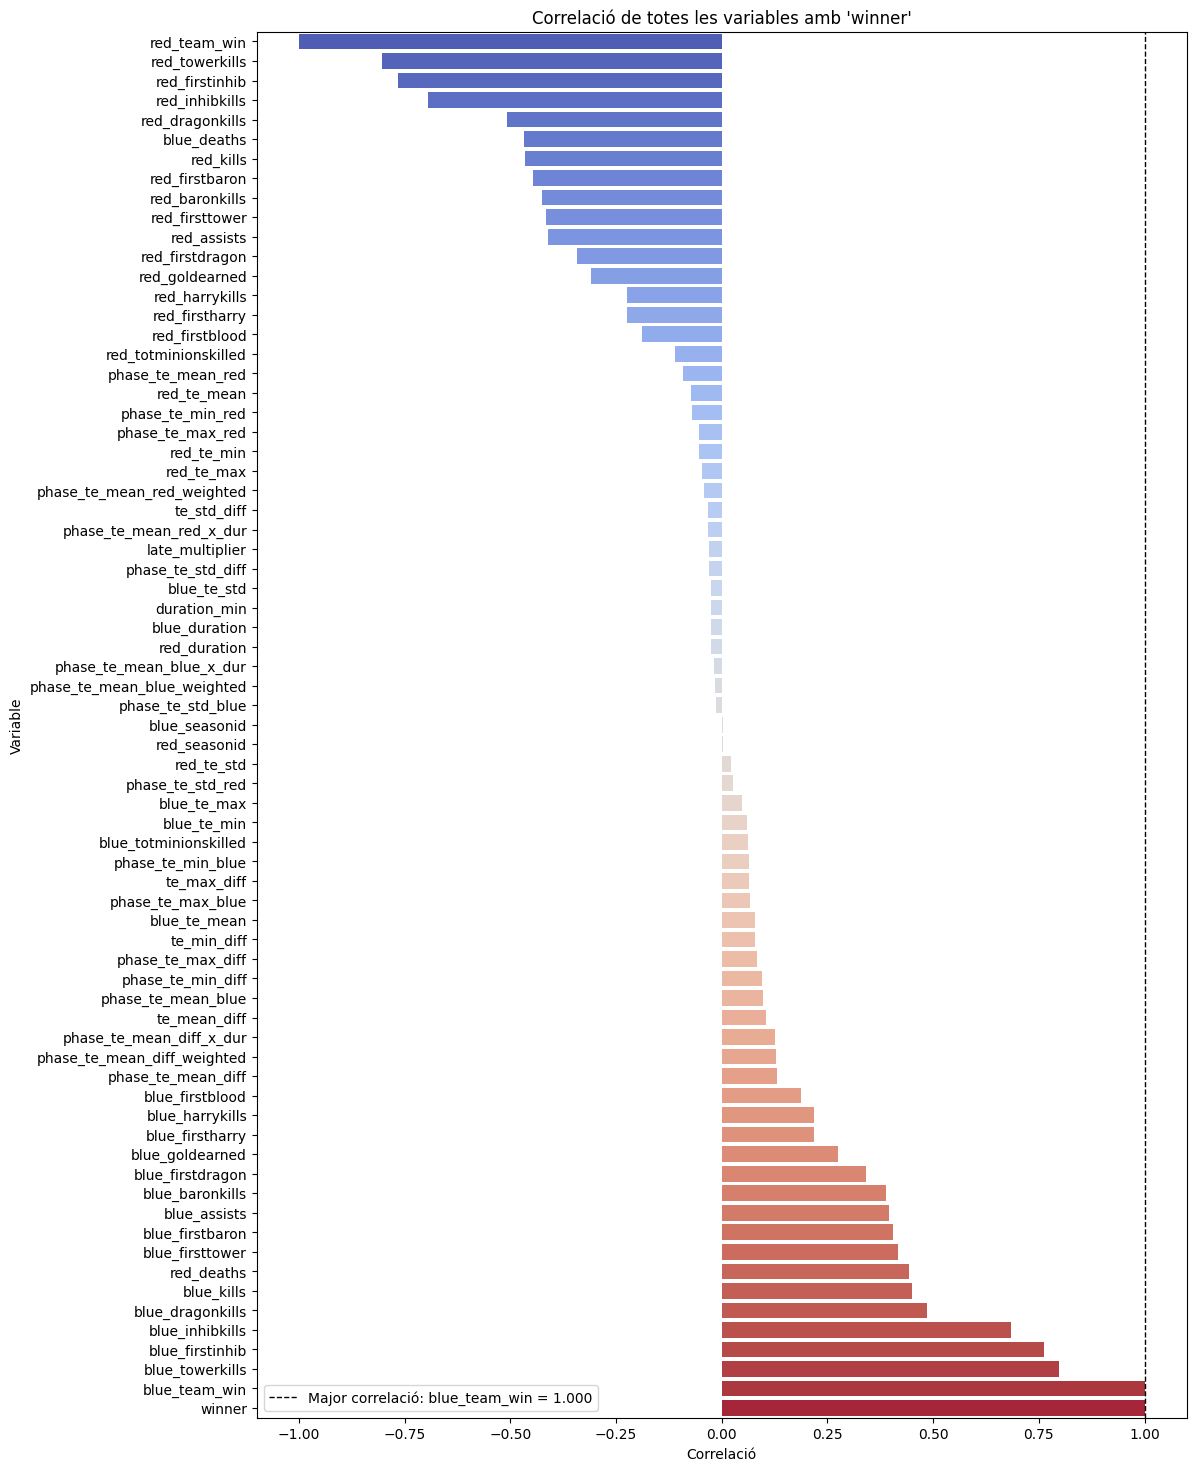

In [127]:
num_cols = df.select_dtypes(include=[np.number]).columns

cols_to_drop = [
    'blue_matchid', 'red_matchid',
    'blue_gameid',
    'blue_teamid_x', 'blue_teamid_y',
    'red_teamid_x', 'red_teamid_y'
]

cols_to_drop = [c for c in cols_to_drop if c in num_cols]

use_cols = [c for c in num_cols if c not in cols_to_drop]

corr_with_winner = df[use_cols].corr(numeric_only=True)['winner'].sort_values()

top_n = 5
top_features = corr_with_winner.abs().sort_values(ascending=False).head(top_n).index

colors = [
    'tab:red' if col in top_features else 'lightgrey'
    for col in corr_with_winner.index
]


plt.figure(figsize=(12, 18))

# Gràfica amb totes les variables
sns.barplot(
    x=corr_with_winner.values,
    y=corr_with_winner.index,
    palette=sns.color_palette("coolwarm", len(corr_with_winner))
)

plt.title("Correlació de totes les variables amb 'winner'")
plt.xlabel("Correlació")
plt.ylabel("Variable")

# Destaquem la variable més correlacionada
max_var = corr_with_winner.idxmax()
max_val = corr_with_winner.max()

plt.axvline(
    x=max_val,
    color="black",
    linestyle="--",
    linewidth=1,
    label=f"Major correlació: {max_var} = {max_val:.3f}"
)
plt.legend()

plt.show()

### Conclusions de la correlació de les variables amb `winner`

En aquest gràfic hem representat la correlació de totes les variables numèriques amb la variable objectiu `winner`, que indica si guanya l’equip blau.  
Per interpretar correctament el resultat, hem ignorat les variables que ja contenen directament la informació del guanyador (com `blue_team_win`, `red_team_win` o la mateixa `winner`), ja que donarien una visió enganyosa.

L’anàlisi es pot dividir en quatre blocs principals.

#### 1. Estadístiques de l’equip blau (correlació positiva)

Les variables que mostren una correlació positiva amb `winner` són aquelles que descriuen un bon rendiment de l’equip blau. Com més alta és la seva correlació, més probable és que l’equip blau guanyi quan aquestes estadístiques són elevades.

Entre les variables més relacionades amb la victòria hi ha:

- Nombre de torres destruïdes (`blue_towerkills`)
- Nombre d’inhibidors destruïts (`blue_inhibkills`)
- Nombre de dracs, barons o heralds aconseguits
- Kills, assistències i or aconseguit
- Primera torre, primer drac, primera sang, etc.

Això indica que els objectius importants i el rendiment econòmic i de combat de l’equip blau són factors clau per explicar el resultat final.

#### 2. Estadístiques de l’equip vermell (correlació negativa)

Les variables equivalents però de l’equip vermell mostren correlacions negatives.  
Això és coherent, perquè un valor alt en aquestes estadístiques significa que l’equip vermell ha jugat millor i, per tant, és menys probable que guanyi l’equip blau (que és el que mesura `winner`).

Les variables més destacades són:

- Torres destruïdes pel vermell (`red_towerkills`)
- Inhibidors destruïts (`red_inhibkills`)
- Objectius majors aconseguits (`red_dragonkills`, `red_baronkills`, etc.)
- Kills, assistències i or aconseguit pel vermell
- Primeres accions com primera torre o primer drac

Aquest patró simètric confirma que el dataset és coherent i que les mètriques d’un equip s’oposen a les de l’altre en relació amb el resultat.

#### 3. Variables de composició de campions (`te_*` i `phase_te_*`)

Aquestes variables mesuren la "força teòrica" de la composició de campions d’un equip, calculada a partir del rendiment històric dels campions en moltes partides.  
Mostren una correlació moderada amb el resultat, inferior a la dels objectius dins la partida.

Això té una explicació lògica: la composició de campions pot donar avantatge, però no garanteix el resultat. El que passa dins la partida (objectius, or i combat) té un pes molt més gran.

Tot i així, aquestes variables aporten informació útil, ja que capturen la capacitat potencial dels equips.

#### 4. Variables relacionades amb la fase del joc i el late game

Les noves variables introduïdes en aquest apartat, com:

- `phase_te_mean_blue`
- `phase_te_mean_red`
- `phase_te_mean_diff`
- `phase_te_mean_blue_weighted`
- `phase_te_mean_red_weighted`
- `late_multiplier`

tenen correlacions més baixes, però aporten informació addicional sobre com els equips estan preparats per partides llargues o curtes.

Aquestes variables reflecteixen:

- si els campions d’un equip són especialment forts en partides llargues (late game),
- o si depenen més de fases inicials.

La correlació és més baixa perquè la influència del late game només és rellevant en partides que realment arriben a aquesta fase. Tot i això, aquestes variables són importants per al model perquè aporten un matís estratègic que no queda reflectit en les estadístiques bàsiques.

#### Resum general

Les variables amb més correlació amb la victòria són les que descriuen el rendiment real dels equips: objectius aconseguits, kills, economia i control del mapa.

Les variables de composició aporten informació addicional i moderada, i les variables noves relacionades amb la fase del joc afegeixen un nivell extra de comprensió sobre la força potencial de cada equip, especialment en partides llargues.

Aquesta combinació de variables ofereix una visió completa i equilibrada:
- el que un equip fa dins la partida,
- el potencial de la seva composició,
- i com aquest potencial varia segons la duració del joc.

Tot plegat resulta molt útil per construir un model predictiu sòlid i realista.

## 5.4 Tractament i selecció de variables

En analitzar la correlació amb la variable objectiu `winner`, hem observat que hi ha
columnes que no s’han d’incloure en el model perquè provoquen *fuita d’informació*
o perquè fan que la predicció sigui excessivament trivial.

### Variables que eliminarem

### 1. Variables que codifiquen directament el resultat
Aquestes columnes reflecteixen explícitament quin equip ha guanyat,
de manera que deixar-les al model seria equivalent a donar-li la resposta:

- `blue_team_win`
- `red_team_win`

### 2. Variables d’objectius massa deterministes
Hi ha objectius que, quan ja han passat, deixen el resultat pràcticament decidit.
Incloure’ls faria que el model aprengués situacions “massa tardanes”.

Eliminarem sobretot:

- **torres totals** (`blue_towerkills`, `red_towerkills`)  
  → en la gran majoria de partides, l’equip que tira més torres és qui guanya.

- **inhibidors** (`blue_firstinhib`, `red_firstinhib`, `blue_inhibkills`, `red_inhibkills`)  
  → un inhibidor destruït acostuma a marcar un avantatge gairebé definitiu.

Aquestes variables són útils per explicar què ha passat en una partida,
però no per predir-la de manera anticipada.

### 3. Identificadors sense informació predictiva
Aquests camps només serveixen per identificar partides o equips, però
no contenen cap senyal útil per al model:

- `blue_matchid`, `red_matchid`
- `blue_gameid`
- `blue_teamid_x`, `blue_teamid_y`
- `red_teamid_x`, `red_teamid_y`

### 4. Variables relacionades amb la versió del joc
El número de versió (`patch`) no aporta informació directa
sobre qui guanyarà una partida concreta:

- `blue_version`
- `red_version`

### Objectius d’aquesta secció

1. Eliminar totes les variables que generen fuita d’informació
   o que fan que la predicció sigui massa trivial.
2. Tornar a calcular la correlació amb `winner` només amb variables netes.
3. Visualitzar les correlacions per comprovar que el model treballa
   amb informació rellevant i sense trampes.

In [128]:
import numpy as np

# Columnes que volem excloure explícitament de l'anàlisi
cols_a_excloure = [

    # resultat duplicat
    'blue_team_win', 'red_team_win',

    # objectius massa deterministes
    'blue_towerkills', 'red_towerkills',
    'blue_firstinhib', 'red_firstinhib',
    'blue_inhibkills', 'red_inhibkills',

    # identificadors
    'blue_matchid', 'red_matchid',
    'blue_teamid_x', 'blue_teamid_y',
    'red_teamid_x', 'red_teamid_y',
    'blue_gameid',

    # versions del joc
    'blue_version', 'red_version'
]

# Columnes numèriques del dataset
df_num = df.select_dtypes(include=[np.number])

# Correlació amb la variable objectiu
correlacions = df_num.corr()['winner']

# Eliminem les columnes no desitjades i també la correlació trivial amb ella mateixa
cols_a_excloure_present = [c for c in cols_a_excloure if c in correlacions.index]

correlacions_netes = correlacions.drop(
    cols_a_excloure_present + ['winner'],
    errors='ignore'
).sort_values(ascending=False)

correlacions_netes

# Eliminem també les partides "remake" (duració < 300 segons)
df = df[
    (df["blue_duration"] >= 300) &
    (df["red_duration"]  >= 300)
].copy()

# 6. Preparació de les dades (Data preparation)

En aquest apartat deixem el dataset llest per al modelatge.  
Apliquem totes les transformacions necessàries: tractament de valors perduts, selecció de variables,
eliminació de partides no vàlides, creació de noves característiques i construcció del dataset final
`df_model` sense fuita d’informació.

Un cop les dades estan netes i preparades, fem la divisió en:

- **Training set**: per ajustar els models.
- **Test set**: per avaluar el rendiment sobre dades no vistes.

La separació es fa mantenint la proporció original de classes (`stratify`).


## 6.1 Selecció final de variables explicatives

Després d’haver analitzat les correlacions i d’eliminar totes les variables que
provocaven *fuita d’informació* —és a dir, aquelles que revelaven directament
el resultat o que només tindríem disponibles quan la partida ja està pràcticament decidida—,
ja podem definir el conjunt final de variables que farem servir en el model.

L’objectiu és construir un model **realista**, capaç de predir el guanyador
d’una partida sense basar-se en estadístiques que descriuen el que ja ha passat.
Per aquest motiu excloem:

- kills totals,
- dracs totals,
- barons totals,
- or final,
- minions finals,
- torres finals,
- inhibidors (primers i totals),
- duració final de la partida,
- i qualsevol identificador o resultat post-partida.

Aquestes variables són molt útils per explicar *per què* un equip ha guanyat,
però **no per predir**, perquè reflecteixen estats ja avançats o finals de la partida.

En canvi, mantenim variables que **sí que són informatives abans del resultat final**,
i que aporten context estratègic, avantatge inicial, o força teòrica de la composició.
A més, incorporem noves característiques dissenyades específicament per capturar
el comportament de les composicions segons la duració real del partit.

A continuació presentem les categories de variables que formen el dataset final.

### 1. Variables de primeres accions  
Són esdeveniments inicials que indiquen quin equip ha començat dominant,
però no determinen el resultat final.

- `blue_firstblood`, `red_firstblood`
- `blue_firsttower`, `red_firsttower`
- `blue_firstdragon`, `red_firstdragon`
- `blue_firstbaron`, `red_firstbaron`
- `blue_firstharry`, `red_firstharry`

*(Les accions relacionades amb inhibidors no es mantenen perquè són massa deterministes.)*

### 2. Variables de composició d’equip (Target Encoding)  
Descriuen la força teòrica dels campions de cada equip, basada en rendiment històric.

- `blue_te_mean`, `red_te_mean`
- `blue_te_max`, `blue_te_min`, `blue_te_std`
- `red_te_max`, `red_te_min`, `red_te_std`
- `te_mean_diff`, `te_max_diff`, `te_min_diff`, `te_std_diff`

### 3. Variables de força per fase (early/mid/late)  
Capturen com de bons són els campions en cada fase de la partida.

- `phase_te_mean_blue`, `phase_te_mean_red`
- `phase_te_mean_diff`
- `phase_te_std_blue`, `phase_te_std_red`
- `phase_te_min_blue`, `phase_te_min_red`
- `phase_te_max_blue`, `phase_te_max_red`

### 4. Variables ponderades pel late game  
Apliquem un **multiplicador sigmoïdal** basat en la duració real de la partida.
Això fa que les composicions fortes en late game tinguin més pes en partides llargues.

- `late_multiplier`
- `phase_te_mean_blue_weighted`
- `phase_te_mean_red_weighted`
- `phase_te_mean_diff_weighted`

### 5. Interaccions entre composició i duració  
Permeten capturar relacions no lineals entre la força de la composició
i el temps real de partida.

- `phase_te_mean_diff_x_dur`
- `phase_te_mean_blue_x_dur`
- `phase_te_mean_red_x_dur`

In [129]:
vars_model = [

    # primeres accions (sense inhibidors)
    'blue_firstblood','red_firstblood',
    'blue_firsttower','red_firsttower',
    'blue_firstdragon','red_firstdragon',
    'blue_firstbaron','red_firstbaron',
    'blue_firstharry','red_firstharry',

    # composició d'equip (target encoding global)
    'blue_te_mean','red_te_mean','te_mean_diff',
    'blue_te_max','blue_te_min','blue_te_std',
    'red_te_max','red_te_min','red_te_std',
    'te_max_diff','te_min_diff','te_std_diff',

    # força per fase (early/mid/late)
    'phase_te_mean_blue','phase_te_mean_red','phase_te_mean_diff',
    'phase_te_std_blue','phase_te_std_red',
    'phase_te_min_blue','phase_te_min_red',
    'phase_te_max_blue','phase_te_max_red',

    # ponderació pel late game (sigmoidal)
    'late_multiplier',
    'phase_te_mean_blue_weighted','phase_te_mean_red_weighted',
    'phase_te_mean_diff_weighted',

    # interaccions entre composició i duració
    'phase_te_mean_diff_x_dur',
    'phase_te_mean_blue_x_dur',
    'phase_te_mean_red_x_dur'
]

# ============== DATAFRAME FINAL PER AL MODEL ==============
df_model = df[vars_model + ['winner']].copy()

print("Forma final de df_model:", df_model.shape)
df_model.head()

Forma final de df_model: (179269, 39)


,blue_firstblood,red_firstblood,blue_firsttower,red_firsttower,blue_firstdragon,red_firstdragon,blue_firstbaron,red_firstbaron,blue_firstharry,red_firstharry,blue_te_mean,red_te_mean,te_mean_diff,blue_te_max,blue_te_min,blue_te_std,red_te_max,red_te_min,red_te_std,te_max_diff,te_min_diff,te_std_diff,phase_te_mean_blue,phase_te_mean_red,phase_te_mean_diff,phase_te_std_blue,phase_te_std_red,phase_te_min_blue,phase_te_min_red,phase_te_max_blue,phase_te_max_red,late_multiplier,phase_te_mean_blue_weighted,phase_te_mean_red_weighted,phase_te_mean_diff_weighted,phase_te_mean_diff_x_dur,phase_te_mean_blue_x_dur,phase_te_mean_red_x_dur,winner
0,0,1,1,0,0,1,0,1,0,1,0.507443,0.513354,-0.005911,0.524503,0.482524,0.017070,0.532189,0.492475,0.014869,-0.007686,-0.009951,0.002201,0.503083,0.517427,-0.014344,0.012199,0.025661,0.486821,0.498065,0.521092,0.559475,1.686805,0.848603,0.872799,-0.024195,-0.456371,16.006428,16.462799,0
1,1,0,0,1,0,1,0,0,0,0,0.501231,0.504884,-0.003653,0.516650,0.481677,0.015323,0.519634,0.488710,0.011474,-0.002984,-0.007033,0.003849,0.493837,0.503133,-0.009295,0.028167,0.017081,0.460095,0.479855,0.534054,0.525863,1.566302,0.773498,0.788058,-0.014559,-0.262285,13.934446,14.196730,0
2,1,0,0,1,0,1,0,0,0,0,0.513243,0.516069,-0.002826,0.529427,0.495772,0.015370,0.532041,0.505212,0.012012,-0.002614,-0.009441,0.003358,0.501786,0.511078,-0.009292,0.035957,0.021414,0.447069,0.496426,0.542666,0.547715,1.355331,0.680086,0.692680,-0.012594,-0.229519,12.394113,12.623632,0
3,1,0,1,0,1,0,0,1,1,0,0.482963,0.487695,-0.004732,0.522779,0.459867,0.028191,0.517956,0.459533,0.021805,0.004823,0.000334,0.006386,0.484762,0.495537,-0.010775,0.022857,0.016357,0.465533,0.473659,0.517991,0.519397,1.700431,0.824304,0.842627,-0.018323,-0.350921,15.787082,16.138003,0
4,1,0,0,1,0,1,0,1,1,0,0.495498,0.504733,-0.009235,0.510979,0.463535,0.018473,0.520145,0.483393,0.013803,-0.009167,-0.019858,0.004669,0.499706,0.499120,0.000586,0.009830,0.012794,0.486714,0.483190,0.511563,0.513403,1.723514,0.861250,0.860241,0.001009,0.020176,17.214870,17.194695,0


## 6.2 Tractament dels valors mancants (NaN)

Abans d’entrenar els models, és important revisar si el nostre dataset conté
valors mancants (`NaN`) i decidir com tractar-los.

En el nostre cas, després de crear les variables avançades de target encoding
per fase (`phase_te_*`), han aparegut alguns `NaN`, especialment en:

- `phase_te_std_red` i altres columnes relacionades amb la desviació estàndard.

Això és lògic: la desviació estàndard per equip i fase només té sentit quan hi ha
diversos campions amb un valor vàlid. Si per algun motiu només hi ha un campió
vàlid en aquella fase, la desviació estàndard queda indefinida i pot aparèixer
com a `NaN`.

Si no tractem aquests valors, alguns models (com la regressió logística) no
acceptaran el dataset i produiran errors. Per tant:

1. Primer identifiquem en quines columnes tenim `NaN`.
2. Després apliquem una estratègia senzilla i coherent per imputar-los.


In [130]:
na_counts = df_model.isna().sum().sort_values(ascending=False)
na_counts[na_counts > 0]


phase_te_std_red               1528
red_te_min                        2
red_te_max                        2
blue_te_max                       2
te_mean_diff                      2
blue_te_mean                      2
blue_te_min                       2
phase_te_mean_diff_x_dur          2
phase_te_mean_red_x_dur           2
phase_te_mean_red_weighted        2
phase_te_mean_diff_weighted       2
phase_te_max_red                  2
phase_te_mean_diff                2
phase_te_mean_red                 2
red_te_mean                       2
te_max_diff                       2
te_min_diff                       2
te_std_diff                       2
red_te_std                        2
phase_te_min_red                  2
blue_te_std                       2
phase_te_std_blue                 1
dtype: int64

En aquest projecte seguirem una estratègia simple i coherent:

- Per a les **desviacions estàndard** (`phase_te_std_*`), imputarem els `NaN` amb **0**.  
  Si un equip té només un campió vàlid, la dispersió real entre campions és zero.

- Per a possibles `NaN` en mínims i màxims (`phase_te_min_*`, `phase_te_max_*`), 
  imputarem amb la **mediana** de la columna, per no afavorir valors extrems.

- Si quedés algun altre `NaN` a qualsevol altra feature numèrica, també el
  imputarem amb la mediana de la seva columna.

D’aquesta manera:

- mantenim totes les files (no perdem partides),
- no introduïm valors fora d’escala,
- i deixem el dataset preparat per als models que no accepten `NaN`.

In [131]:
# Desviacions estàndard per fase (blue, red, diff) -> 0
std_cols = [col for col in df_model.columns if 'phase_te_std' in col]

for col in std_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].fillna(0)

# Eliminem qualsevol altre NaN restant
df_model = df_model.dropna().copy()

# ===== Eliminació de partides "remake" (< 180 segons) =====

# Cas 1: tenim blue_duration i red_duration (com al csv lol_final)
if "blue_duration" in df_model.columns and "red_duration" in df_model.columns:
    df_model = df_model[
        (df_model["blue_duration"] >= 180) &
        (df_model["red_duration"] >= 180)
    ].copy()

# Comprovació final
print("Total de NaNs després del tractament:", int(df_model.isna().sum().sum()))
print("Total de files després d'eliminar remakes:", len(df_model))
df_model.isna().sum().sort_values(ascending=False).head()


Total de NaNs després del tractament: 0
Total de files després d'eliminar remakes: 179267


blue_firstblood     0
red_firstblood      0
blue_firsttower     0
red_firsttower      0
blue_firstdragon    0
dtype: int64

#### Per què imputem amb 0 els `NaN` de les columnes `phase_te_std_*`?

Les variables `phase_te_std_blue`, `phase_te_std_red` i `phase_te_std_diff` representen
la **desviació estàndard** del *target encoding per fase* dels cinc campions de cada equip.
Aquesta mètrica reflecteix fins a quin punt els campions d’un equip tenen un rendiment
coherent o heterogeneous dins d’una mateixa fase de la partida (early, mid o late).

Un `NaN` apareix quan:

- un equip té **només un campió amb un valor vàlid** de target encoding per a aquella fase,
- o bé quan algun campió no disposava de prou dades per calcular el seu target encoding,
  i això deixa l’equip amb menys valors dels necessaris.

En qualsevol d’aquests casos, el significat estadístic és clar:

> Si només hi ha un valor disponible, **la desviació estàndard real és 0**, perquè no hi ha cap variació possible.

Per aquest motiu, imputar els `NaN` de les columnes `phase_te_std_*` amb 0 és:

- **coherent matemàticament**: la variabilitat entre un sol valor és zero.
- **consistent amb la definició de desviació estàndard**: no inventem dispersions inexistents.
- **més informatiu per al model** que altres estratègies (com la mediana o la mitjana),
  que podrien introduir soroll artificial.
- **pràctic**: ens permet mantenir totes les files del dataset sense eliminar cap partida.

Aquesta estratègia assegura que les variables de variabilitat (`std`) continuïn sent fidels
al que realment representen i que el model pugui interpretar correctament els casos en què
un equip presenta uniformitat total en els seus valors de força per fase.

## 6.3. Eliminació de partides *remake* (duració < 300 segons)

Abans de preparar el dataset final per al modelatge, s’han eliminat totes les partides amb una duració inferior als **300 segons** (5 minuts). Aquestes partides corresponen a situacions anormals del joc, com ara:

- *Remakes* (quan un jugador no es connecta i la partida es reinicia),
- Partides cancel·lades o interrompudes prematurament,
- Registres incomplets o tècnicament invàlids.

Aquest tipus d’observacions no representen partides competitives reals i distorsionen tant la distribució de les duracions com la relació entre la composició *early/mid/late* i el resultat final.  
Per aquest motiu, totes les partides amb duració `< 300` segons han estat filtrades, assegurant que el model només treballi amb partides completes, fiables i significatives.


## 6.4. Divisió Train/Test

En aquest apartat preparem les dades per poder entrenar els models de classificació.
Com que el dataset `df_model` ja conté únicament les variables útils i sense fuita
d’informació, l’últim pas abans d’entrenar consisteix a separar les dades en:

- **Training set**: utilitzat per entrenar els models.  
- **Test set**: utilitzat per avaluar el rendiment sobre dades no vistes.

Fem la divisió mantenint la proporció original de classes (`stratify`).


In [132]:
from sklearn.model_selection import train_test_split

# X = variables explicatives
X = df_model.drop(columns=['winner'])

# y = variable objectiu
y = df_model['winner']

# Fem la divisió train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Mides del conjunt de dades:")
print(" - X_train:", X_train.shape)
print(" - X_test :", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test :", y_test.shape)

Mides del conjunt de dades:
 - X_train: (143413, 38)
 - X_test : (35854, 38)
 - y_train: (143413,)
 - y_test : (35854,)


# 7. Model de referència i mètriques d'avaluació

Abans de construir models més sofisticats, definirem:

1. Quines **mètriques** farem servir per avaluar-los.
2. Un **model de referència (baseline)** molt senzill, que ens servirà com a punt
   de comparació. Qualsevol model "seriós" hauria de millorar aquest baseline.

L’objectiu d’aquest apartat és, per tant, tenir:

- una base clara de què significa “anar bé” per al nostre problema,
- i un primer model trivial que aprofiti només la distribució de classes.


## 7.1 Distribució de classes i mètriques utilitzades

Abans de definir les mètriques, comprovem com de desequilibrades estan les classes
de `winner` al conjunt d’entrenament. Això ens ajuda a interpretar millor l’accuracy
i a decidir quines altres mètriques són importants.

In [133]:
class_counts = y_train.value_counts()
class_ratios = y_train.value_counts(normalize=True)

display(pd.DataFrame({
    'compte': class_counts,
    'percentatge': (class_ratios * 100).round(2)
}))

,compte,percentatge
winner,,
1,73565,51.3
0,69848,48.7


## 7.2 Selecció de mètriques d’avaluació

La variable objectiu `winner` presenta una distribució força equilibrada entre les dues
classes (victòria blau i victòria vermell). Això implica que podem utilitzar mètriques
estàndard de classificació sense preocupar-nos d’un desequilibri sever.

Per tal d’avaluar i comparar de manera fiable els models de classificació que provarem,
fem servir les següents mètriques:

- **Accuracy**  
  Proporciona el percentatge total d’encerts. És útil perquè les classes estan equilibrades
  i ens dona una visió global del rendiment.

- **F1-score**  
  Combina *precision* i *recall* en una sola mètrica. Ens ajuda a veure si el model
  detecta bé ambdues classes i evita comportaments trivials.

- **ROC-AUC**  
  Mesura la capacitat del model per distingir entre les dues classes per sobre dels
  llindars. És una mètrica molt robusta i útil per comparar models.

- **Matriu de confusió**  
  Ens permet entendre en quins casos encerta i en quins falla el model, i si hi ha
  algun patró d’errors rellevant.

Aquest conjunt de mètriques ens donarà una visió clara i completa del rendiment
de cada model i ens permetrà seleccionar el millor candidat de manera informada.


# 8. Comparació de models simples (sense hiperparàmetres)

En aquest apartat compararem diversos models de classificació utilitzant únicament
els paràmetres per defecte. L’objectiu és veure quin tipus de model s’adapta millor
al nostre problema abans de fer una cerca d’hiperparàmetres més avançada.

Els models escollits són:

1. **Regressió logística**  
   Model lineal, senzill i interpretable. Serveix com a referència “clàssica”.

2. **Random Forest**  
   Bosc d’arbres de decisió entrenats amb *bagging*. Robust i capaç de capturar
   relacions no lineals.

3. **Gradient Boosting (sklearn)**  
   Model d’arbres seqüencials que intenten corregir els errors del model anterior.
   Sol funcionar molt bé en taules numèriques.

4. **XGBClassifier (XGBoost)**  
   Implementació optimitzada de gradient boosting. Molt utilitzat en competicions
   de Kaggle i datasets tabulars.  
   (*Cal tenir instal·lat el paquet `xgboost`*.)

Tots els models es compararan amb les mateixes mètriques:

- **Accuracy**
- **F1-score**
- **ROC-AUC**
- **Matriu de confusió**


In [134]:
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=500, n_jobs=-1))
])

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

gb = GradientBoostingClassifier(random_state=42)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "y_pred": y_pred
    }


In [135]:
results = {}

# Logistic Regression
results["Logistic Regression"] = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

# Random Forest
results["Random Forest"] = evaluate_model(rf, X_train, y_train, X_test, y_test)

# Gradient Boosting
results["Gradient Boosting"] = evaluate_model(gb, X_train, y_train, X_test, y_test)

# XGBoost 
results["XGBoost"] = evaluate_model(xgb, X_train, y_train, X_test, y_test)

# Taula amb les mètriques principals
results_table = pd.DataFrame({
    model_name: {
        "Accuracy": round(metrics["Accuracy"], 4),
        "F1-score": round(metrics["F1-score"], 4),
        "ROC-AUC": round(metrics["ROC-AUC"], 4)
    }
    for model_name, metrics in results.items()
}).T

results_table


,Accuracy,F1-score,ROC-AUC
Logistic Regression,0.8143,0.8195,0.8770
Random Forest,0.8196,0.8234,0.9050
Gradient Boosting,0.8223,0.8266,0.9094
XGBoost,0.8232,0.8276,0.9107


### Matriu de confusió

Per entendre millor com s’equivoca cada model, mostrem la matriu de confusió
per a cadascun d’ells. Això ens permet veure si hi ha algun model que:

- encerti molt les victòries de l’equip blau però falli les del vermell,  
- o al revés,
- o bé mantingui un bon equilibri entre ambdues classes.

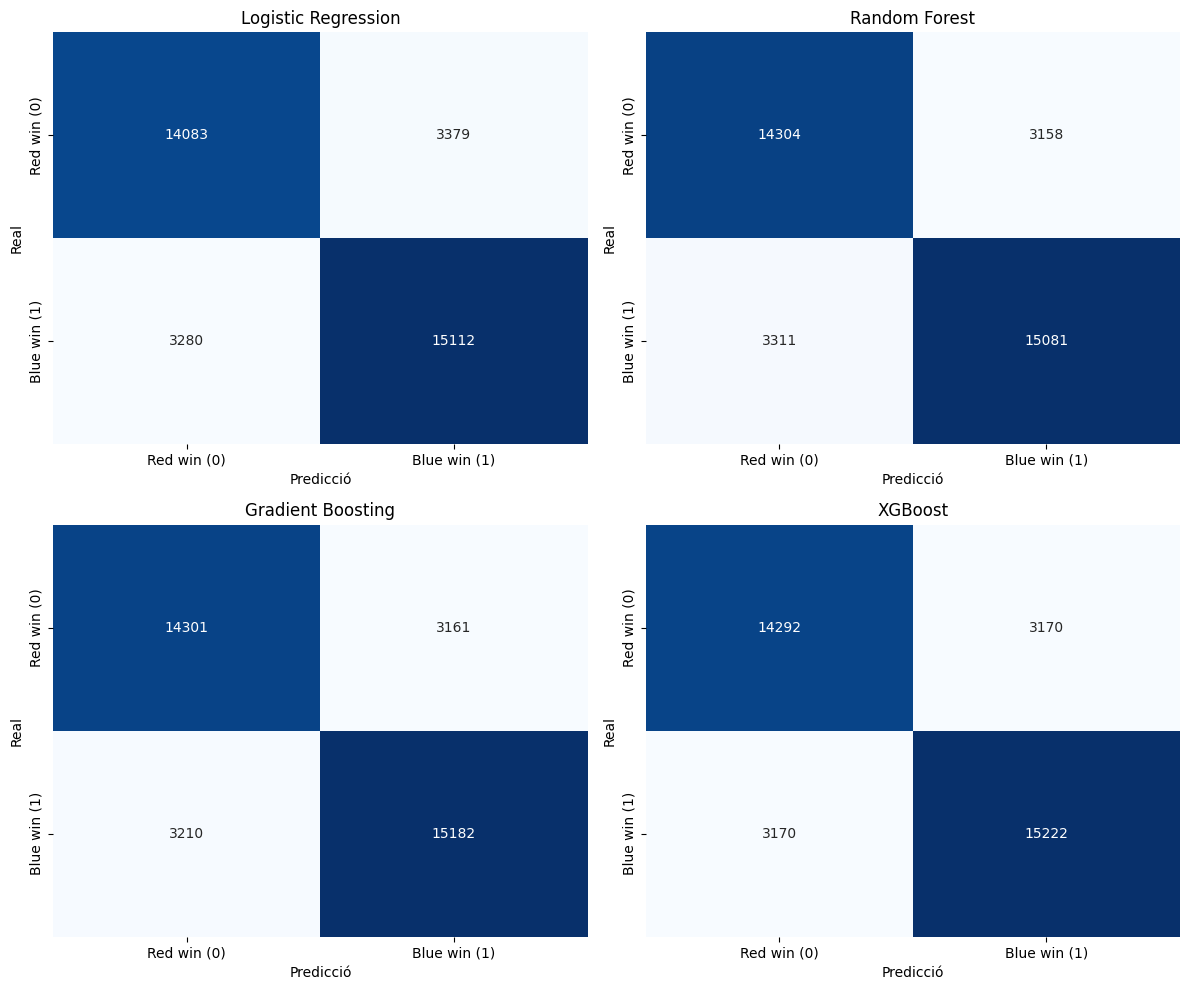

In [136]:
model_names = list(results.keys())

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, name in zip(axes, model_names):
    y_pred = results[name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        ax=ax
    )
    ax.set_title(name)
    ax.set_xlabel("Predicció")
    ax.set_ylabel("Real")
    ax.set_xticklabels(["Red win (0)", "Blue win (1)"])
    ax.set_yticklabels(["Red win (0)", "Blue win (1)"])

for i in range(len(model_names), 4):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Conclusions de la comparació de models

Després d’entrenar els quatre models analitzats —Regressió Logística, Random Forest,
Gradient Boosting i XGBoost— observem que tots obtenen un rendiment similar i força elevat,
amb **accuracy entre 0.81 i 0.82**, prova que les noves variables de composició per fase,
ponderacions de late game i eliminació d’inhibidors funcionen de manera estable.

Tot i això, hi ha diferències clares entre ells.

### Regressió Logística
Actua com a model base i assoleix un bon rendiment general  
(**Accuracy = 0.814**, **F1 = 0.820**, **ROC-AUC = 0.877**),  
però és el model més simple i té dificultats per capturar les interaccions
no lineals entre les nostres noves característiques (especialment les basades en composició i duració).

### Random Forest
Millora lleugerament la regressió logística:  
**Accuracy = 0.820**, **F1 = 0.823**, **ROC-AUC = 0.905**.  
És més flexible que un model lineal i capta millor la dinàmica del joc,
però encara queda una mica per sota dels models de boosting.

### Gradient Boosting (sklearn)
Un pas més en qualitat.  
**Accuracy = 0.822**, **F1 = 0.827**, **ROC-AUC = 0.909**.  
Aquest model redueix els errors en ambdues classes i mostra un comportament més regular,
especialment en termes de separació entre victòries blau/vermell.

### XGBoost
És el model amb el millor rendiment global:  
- **Accuracy = 0.8232**  
- **F1-score = 0.8276**  
- **ROC-AUC = 0.9107**  

Les matrius de confusió mostren que és el model que comet menys errors totals,
i que manté un balanç molt estable entre prediccions del blau i del vermell.
XGBoost aprofita especialment bé les interaccions entre variables,
com les noves característiques per fase i les ponderacions de late game.

**Conclusió:**  
> XGBoost és el millor model dels quatre i el més adequat per realitzar una fase posterior d’ajust d’hiperparàmetres.

## Per què utilitzem aquestes mètriques?

El nostre dataset és gairebé equilibrat (victòries blau ≈ 51%, vermell ≈ 49%),
de manera que podem utilitzar mètriques globals sense distorsions. Tot i així,
cada mètrica aporta un punt de vista important:

### Accuracy
Mesura l’encert global.  
És fiable perquè no hi ha desequilibri de classes, però pot amagar diferències
entre errors de classe 0 i 1.

### F1-score
Combina precisió i recall.  
Ens garanteix que el model és sòlid predint tant victòries de l’equip blau com del vermell,
sense biaixos.

### ROC-AUC (la més informativa)
Mesura la capacitat de separar les dues classes independentment del llindar.
És la millor mètrica per comparar models perquè:

- no depèn d’un llindar concret,
- mostra realment com de separables són les dues classes,
- permet diferenciar models que simplement “encerten” de models que “classifiquen bé”.

En aquest projecte, el ROC-AUC és el factor clau per escollir el millor model.

## Resum final
1. Tots els models funcionen correctament amb el nou dataset i superen el 0.81 d’accuracy.  
2. Els models basats en boosting (Gradient Boosting i XGBoost) sobresurten per sobre dels altres.  
3. **XGBoost obté les millors mètriques globals** i és el candidat òptim per aplicar **tuning d’hiperparàmetres** en l’apartat següent.


# 9. Hyperparameter tuning de XGBoost

Un cop hem vist que **XGBoost** és el model amb millor rendiment sense
hiperparàmetres afinats, el següent pas és millorar-lo mitjançant una
cerca d’hiperparàmetres (*hyperparameter tuning*).

L’objectiu és trobar una combinació de paràmetres que:

- augmenti el **ROC-AUC** (la nostra mètrica principal de comparació),
- mantingui o millori l’**accuracy** i el **F1-score**,
- i eviti sobreajustar-se al conjunt d’entrenament.

Per fer-ho utilitzarem **RandomizedSearchCV**, que:

- prova combinacions aleatòries d’hiperparàmetres dins d’un rang definit,
- és molt més ràpid que un GridSearch exhaustiu,
- i és suficientment bo per trobar configuracions molt competitives.

## 9.1. Per què utilitzem RandomizedSearchCV en lloc de GridSearchCV?

Hi ha dues estratègies principals per trobar els millors hiperparàmetres d’un model:

- **GridSearchCV**: prova totes les combinacions possibles d’un conjunt definit de valors.
- **RandomizedSearchCV**: prova combinacions aleatòries dins d’un rang especificat.

Tot i que el GridSearch pot semblar més complet, en la pràctica presenta limitacions
importants en models com XGBoost, on hi ha molts hiperparàmetres i cadascun té un
rang ampli de valors possibles.

En aquest projecte hem triat utilitzar **RandomizedSearchCV** per diversos motius:

#### 1. Eficiència computacional molt superior
XGBoost té molts hiperparàmetres importants:

- `n_estimators`
- `max_depth`
- `learning_rate`
- `subsample`
- `colsample_bytree`
- `min_child_weight`
- `gamma`
- etc.

Si féssim un GridSearch complet, el nombre total de combinacions podria ser de
milions, cosa completament inviables fins i tot en màquines potents.

En canvi, RandomizedSearchCV permet controlar exactament **quantes combinacions**
volem provar (`n_iter`), fent-lo molt més ràpid i pràctic.

#### 2. RandomizedSearch sol trobar òptims similars (o millors) amb molt menys cost
La recerca en aprenentatge automàtic ha demostrat que:

> Provar més valors aleatoris en un rang acostuma a ser més efectiu  
> que provar sistemàticament un conjunt reduït i rígid de valors.

A la pràctica, RandomizedSearchCV:

- cobreix millor el **rang complet d’hiperparàmetres**,  
- evita que un Grid “mal definit” passi per alt valors òptims,  
- permet detectar combinacions inesperadament bones.

#### 3. Permet especificar rangs amplis per trobar tendències
En models com XGBoost, és més útil explorar un **rang ampli** de valors:

- profunditats entre 3 i 10,  
- learning rates entre 0.01 i 0.3,  
- subsamples entre 0.6 i 1.0…

GridSearch obligaria a decidir només 3–5 valors fixes, i això pot limitar molt les possibilitats reals del model.

Amb RandomizedSearchCV podem indicar rangs amplis i deixar que el procés explori qualsevol punt d’aquest espai.

#### 4. Evita el sobreajustament a un grid massa concret
GridSearch està limitat per la “forma del grid”.  
Si definim el grid massa estret, podem acabar escollint hiperparàmetres que:

- semblen bons dins del grid,  
- però no són els millors possibles fora d’ell.

RandomizedSearchCV és més robust a aquest problema.

#### 5. És l’estratègia recomanada per a models complexos com XGBoost
A la pràctica professional (i especialment a Kaggle), el flux acostuma a ser:

1. **RandomizedSearchCV** → buscar rangs bons  
2. (Opcional) després un **GridSearch petit** al voltant del millor punt trobat

Això dona el millor equilibri entre:

- velocitat,
- exploració,
- i rendiment final.

### Resum final

**GridSearchCV és útil quan tens pocs hiperparàmetres i valors ben definits.**  
Però en models de boosting com XGBoost, amb molts hiperparàmetres i relacions
no lineals entre ells, GridSearch és:

- massa lent,  
- massa limitat,  
- i sovint menys efectiu.

Per això hem utilitzat **RandomizedSearchCV**:  
> és més ràpid, més flexible i igualment capaç (o fins i tot millor) per trobar configuracions molt competitives.


In [137]:
# Model base de XGBoost
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=-1,
    random_state=42
)

# Espai d'hiperparàmetres per a la cerca aleatòria
param_distributions = {
    "n_estimators": [100, 200, 300, 400],
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0, 0.1, 0.2]
}


## 9.2 RandomizedSearchCV amb validació creuada

Farem una cerca amb:

- `n_iter = 25` combinacions aleatòries,
- validació creuada `cv = 3`,
- mètrica de selecció: **ROC-AUC** (`scoring="roc_auc"`).

Això ens permet trobar bons hiperparàmetres sense un cost computacional
excessiu.

In [138]:
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=25,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(X_train, y_train)

print("Millor ROC-AUC (CV):", xgb_random_search.best_score_)
print("\nMillors hiperparàmetres trobats:")
xgb_random_search.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Millor ROC-AUC (CV): 0.91265274652815

Millors hiperparàmetres trobats:


{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.8}

## 9.3 Model XGBoost optimitzat

Un cop feta la cerca, utilitzem directament el millor model trobat per
RandomizedSearch (`best_estimator_`) i l’avaluem sobre el conjunt de test.

In [139]:
xgb_best = xgb_random_search.best_estimator_

# Prediccions sobre el conjunt de test
y_pred_xgb = xgb_best.predict(X_test)
y_proba_xgb = xgb_best.predict_proba(X_test)[:, 1]

# Mètriques
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy (XGBoost optimitzat): {acc_xgb:.4f}")
print(f"F1-score (XGBoost optimitzat): {f1_xgb:.4f}")
print(f"ROC-AUC (XGBoost optimitzat): {auc_xgb:.4f}\n")

print("Informe de classificació (XGBoost optimitzat):")
print(classification_report(y_test, y_pred_xgb))

print("Matriu de confusió (XGBoost optimitzat):")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)


Accuracy (XGBoost optimitzat): 0.8230
F1-score (XGBoost optimitzat): 0.8276
ROC-AUC (XGBoost optimitzat): 0.9110

Informe de classificació (XGBoost optimitzat):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     17462
           1       0.83      0.83      0.83     18392

    accuracy                           0.82     35854
   macro avg       0.82      0.82      0.82     35854
weighted avg       0.82      0.82      0.82     35854

Matriu de confusió (XGBoost optimitzat):
[[14276  3186]
 [ 3159 15233]]


### Matriu de confusió i corba ROC del model optimitzat


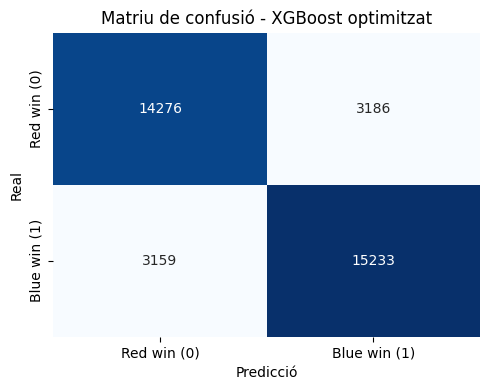

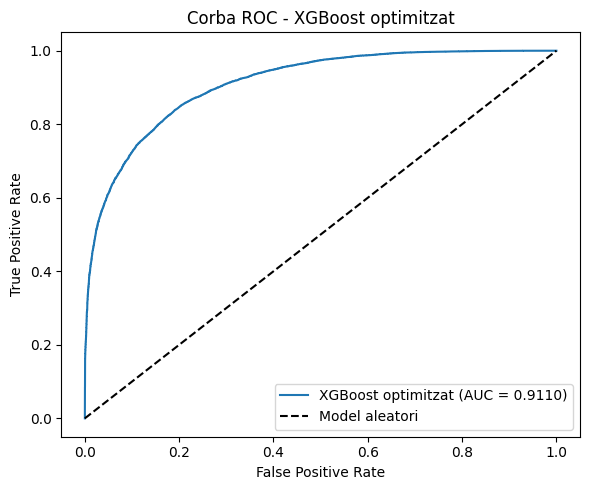

In [140]:
# Matriu de confusió
plt.figure(figsize=(5,4))
sns.heatmap(
    cm_xgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False
)
plt.title("Matriu de confusió - XGBoost optimitzat")
plt.xlabel("Predicció")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ["Red win (0)", "Blue win (1)"])
plt.yticks([0.5, 1.5], ["Red win (0)", "Blue win (1)"])
plt.tight_layout()
plt.show()

# Corba ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost optimitzat (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Model aleatori")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Corba ROC - XGBoost optimitzat")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


### Optimització d’hiperparàmetres (tuning)

Després d’identificar XGBoost com el millor model base, realitzem una fase
d’optimització d’hiperparàmetres per intentar millorar-ne el rendiment.
Utilitzem `RandomizedSearchCV`, ja que permet explorar de manera eficient
una combinació àmplia de paràmetres sense el cost computacional del Grid Search complet.

La validació creuada utilitzada és de **3 folds**, i s’han provat **25 combinacions**
aleatòries del conjunt de paràmetres.

### Millors hiperparàmetres trobats

Els paràmetres seleccionats pel procés d’optimització han estat:

- `max_depth = 5`  
- `min_child_weight = 3`  
- `gamma = 0.2`  
- `subsample = 1.0`  
- `colsample_bytree = 0.8`  
- `learning_rate = 0.1`  
- `n_estimators = 100`

Aquests valors indiquen un model **moderatament profund**, amb regularització lleugera (`gamma`),
i que utilitza una fracció del conjunt de variables en cada arbre per evitar sobreajustament.

La millor puntuació de la validació creuada ha estat:

- **Millor ROC-AUC (CV): 0.9127**

### Rendiment del model XGBoost optimitzat

Un cop entrenat amb els millors hiperparàmetres, el model obté:

- **Accuracy:** 0.8230  
- **F1-score:** 0.8276  
- **ROC-AUC:** 0.9110  

Les mètriques són molt similars al model simple, cosa que indica que:

> **el model base ja estava molt ben ajustat i l’espai d’hiperparàmetres no aporta millores substancials en aquest cas.**

### Matriu de confusió

La distribució d’encerts i errors del model optimitzat és la següent:

- Prediccions correctes (classe 0): 14 276  
- Prediccions errònies (classe 0 → 1): 3 186  
- Prediccions errònies (classe 1 → 0): 3 159  
- Prediccions correctes (classe 1): 15 233  

Això confirma que el model manté un **bon equilibri** entre les dues classes
i que no mostra biaixos significatius cap al blau o cap al vermell.

### Conclusions del tuning

1. L’optimització confirma que **XGBoost és estable i robust**, fins i tot sense tuning agressiu.  
2. Les millores respecte al model base són **mínimes**, cosa que indica que les noves variables
   (composició per fase, ponderació sigmoïdal i interaccions) ja aporten la major part de la informació útil.  
3. El model és adequat per passar a la fase d’anàlisi final i interpretació.

En resum, hem confirmat que XGBoost és el millor model tant abans com després del tuning,
i que és la millor opció per al nostre problema de predicció de victòries.

# 10. Importància de variables (Feature Importance)

Un cop hem obtingut el model final (XGBoost optimitzat), és útil analitzar
quines variables han tingut més influència en el procés de decisió del model.
Aquesta anàlisi ens ajuda a entendre:

- quins factors del joc són més determinants a l’hora de predir el guanyador,
- fins a quin punt la composició de campions o les primeres accions afecten el resultat,
- i si els atributs que hem creat (com la força per fase o els TE ponderats)
  realment aporten valor.

XGBoost calcula la importància de variables basant-se en la contribució
promig de cada feature a les decisions dels arbres del model.
Les importàncies poden interpretar-se com:

- **Més alta:** la variable contribueix fortament a separar victòries blau/vermell.  
- **Més baixa:** aporta poca informació o informació redundant.


In [141]:
importance = xgb_best.feature_importances_

# Taula ordenada
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

feat_imp.head(20)

,feature,importance
3,red_firsttower,0.257424
7,red_firstbaron,0.228631
6,blue_firstbaron,0.167581
2,blue_firsttower,0.079875
5,red_firstdragon,0.035566
36,phase_te_mean_blue_x_dur,0.034902
33,phase_te_mean_red_weighted,0.028890
37,phase_te_mean_red_x_dur,0.028544
4,blue_firstdragon,0.024158
1,red_firstblood,0.014909


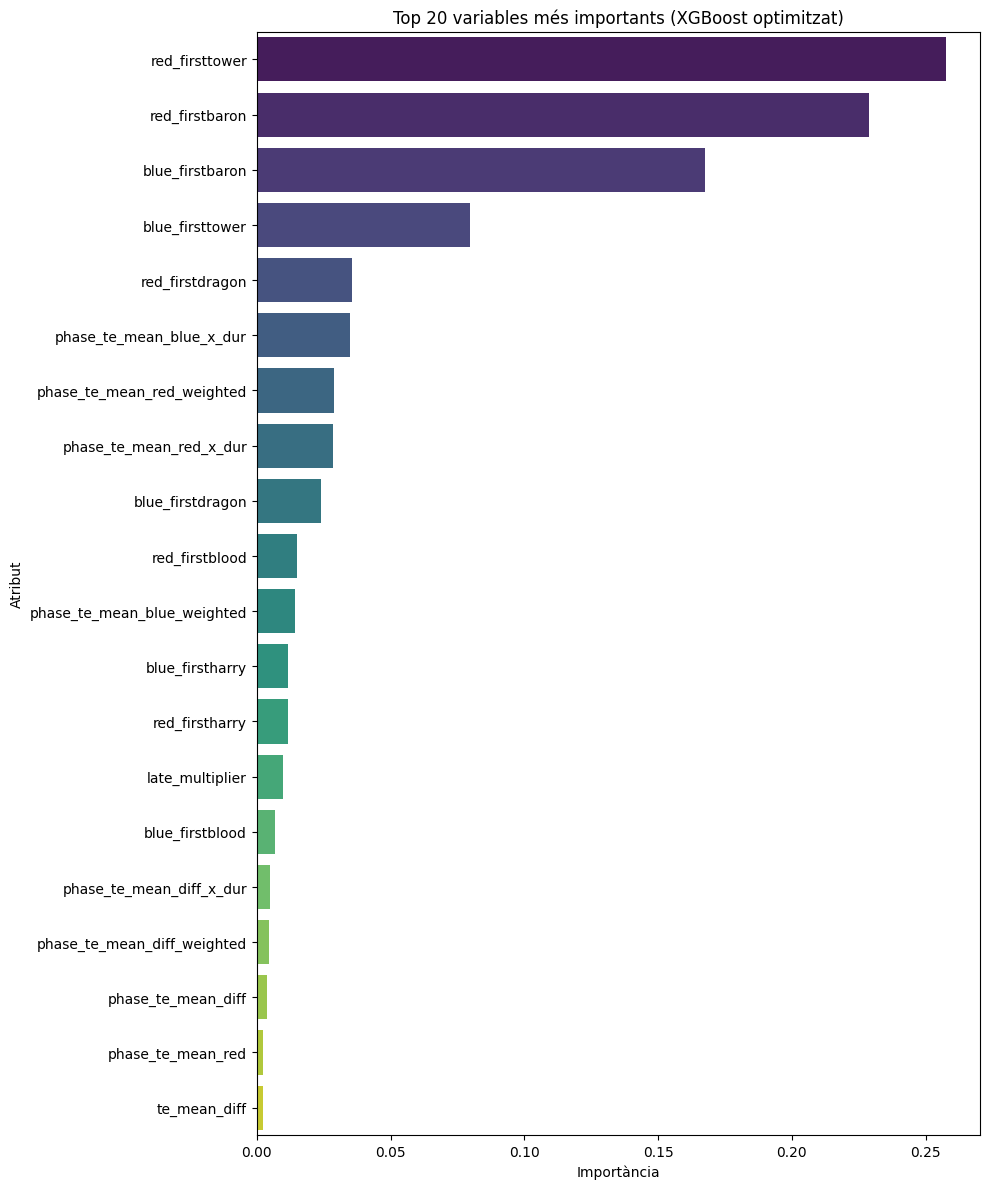

In [142]:
plt.figure(figsize=(10, 12))
sns.barplot(
    data=feat_imp.head(20),
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Top 20 variables més importants (XGBoost optimitzat)")
plt.xlabel("Importància")
plt.ylabel("Atribut")
plt.tight_layout()
plt.show()


## 10.1. Primeres accions: indicadors d’avantatge inicial

Les variables més importants són, de llarg, les **primeres accions** aconseguides pels equips.

Les quatre més rellevants són:

- **`red_firsttower`** (0.257)  
- **`red_firstbaron`** (0.229)  
- **`blue_firstbaron`** (0.168)  
- **`blue_firsttower`** (0.080)

Aquestes accions tenen una lògica molt clara:

- *La primera torre* reflecteix quin equip comença obtenint control de mapa.  
- *El primer baró* és un objectiu de molt alt impacte estratègic, i aconseguir-lo sol
  marcar un punt d’inflexió a la partida.  

És important remarcar que **no hem utilitzat el nombre total de torres ni barons**
(per evitar fuita d’informació), sinó només **qui aconsegueix el primer objectiu**.

Això confirma que els objectius inicials **sí que aporten informació predictiva legítima**
i el model els utilitza intensament.

## 10.2. Composició d’equip i força segons la duració

Un altre bloc de variables molt rellevant és el que prové de les característiques creades al projecte:

- **`phase_te_mean_blue_x_dur`**  
- **`phase_te_mean_red_weighted`**  
- **`phase_te_mean_red_x_dur`**  
- **`phase_te_mean_blue_weighted`**

Aquestes variables tenen importància entre **0.02 i 0.035**, una magnitud considerable.

Això és exactament el que buscàvem quan vam dissenyar:

- el **target encoding per fase** (early / mid / late),  
- la **ponderació sigmoïdal del late game**,  
- i les **interaccions amb la duració en minuts**.

Aquestes variables capturen conceptes del joc que els models per defecte no poden entendre:

- hi ha campions que *escalegen molt bé* al late,  
- hi ha composicions fortes a early que es desinflen,  
- la duració de la partida altera completament les probabilitats de victòria.

El fet que apareguin al **top 10** confirma que aquestes transformacions afegeixen molta
informació nova que el model aprofita.

## 10.3. Altres accions inicials i reforços de fase

També apareixen amb importància notable:

- **`red_firstdragon`**, **`blue_firstdragon`**  
- **`red_firstblood`**, **`blue_firstblood`**  
- **`blue_firstharry`**, **`red_firstharry`**  
- **`late_multiplier`**

Aquestes variables tenen importància entre **0.01 i 0.03**, i reforcen el patró general:

- *no és tant el volum d’objectius finals*,  
- sinó *qui aconsegueix primer els punts clau de la partida*.

El model també utilitza el **late multiplier**, tot i ser una variable sintètica creada
per nosaltres, fet que demostra que la ponderació del late game aporta informació real
sobre la probabilitat de victòria.

# 11. Anàlisi d'errors (Error Analysis)

Un cop entrenat i optimitzat el model XGBoost, és important analitzar de manera detallada
els casos en què s’equivoca. L’objectiu d’aquesta secció és detectar patrons en les partides
mal classificades i comprendre per què, tot i un rendiment global alt, alguns casos segueixen
sent difícils per al model.

Com que el dataset ja no conté remakes ni partides anormalment curtes, els errors s’expliquen
per factors més subtils relacionats amb:
- la dinàmica interna de la partida,
- la força relativa de les composicions,
- i inconsistències entre les primeres accions i el resultat final.


In [143]:
errors = X_test.copy()
errors["real"] = y_test
errors["pred"] = y_pred_xgb
errors["correcte"] = (errors["real"] == errors["pred"]).astype(int)

errors_wrong = errors[errors["correcte"] == 0]
errors_wrong.head()


,blue_firstblood,red_firstblood,blue_firsttower,red_firsttower,blue_firstdragon,red_firstdragon,blue_firstbaron,red_firstbaron,blue_firstharry,red_firstharry,blue_te_mean,red_te_mean,te_mean_diff,blue_te_max,blue_te_min,blue_te_std,red_te_max,red_te_min,red_te_std,te_max_diff,te_min_diff,te_std_diff,phase_te_mean_blue,phase_te_mean_red,phase_te_mean_diff,phase_te_std_blue,phase_te_std_red,phase_te_min_blue,phase_te_min_red,phase_te_max_blue,phase_te_max_red,late_multiplier,phase_te_mean_blue_weighted,phase_te_mean_red_weighted,phase_te_mean_diff_weighted,phase_te_mean_diff_x_dur,phase_te_mean_blue_x_dur,phase_te_mean_red_x_dur,real,pred,correcte
62052,0,1,1,0,1,0,0,0,1,0,0.493753,0.500579,-0.006826,0.507771,0.470515,0.015985,0.526063,0.458246,0.027587,-0.018292,0.012269,-0.011602,0.485036,0.511865,-0.026829,0.012521,0.030128,0.466759,0.465641,0.500307,0.541889,1.746805,0.847263,0.894129,-0.046866,-1.088828,19.684380,20.773207,0,1,0
97798,1,0,0,1,0,1,1,0,0,1,0.496923,0.496647,0.000276,0.504159,0.481571,0.008992,0.507734,0.485982,0.008594,-0.003575,-0.004412,0.000398,0.499070,0.500095,-0.001025,0.009030,0.010044,0.489231,0.489175,0.513482,0.514932,1.741498,0.869129,0.870914,-0.001785,-0.038706,18.848201,18.886907,0,1,0
152774,0,1,1,0,1,0,0,1,0,0,0.500889,0.472938,0.027952,0.517515,0.464843,0.022388,0.509131,0.396630,0.047273,0.008383,0.068213,-0.024885,0.496493,0.480234,0.016259,0.017131,0.027717,0.473239,0.432709,0.518491,0.504930,1.738597,0.863201,0.834933,0.028268,0.600229,18.328858,17.728628,1,0,0
145890,0,1,0,1,1,0,1,0,1,0,0.487439,0.503537,-0.016098,0.508381,0.463690,0.017227,0.512008,0.496636,0.005617,-0.003626,-0.032946,0.011611,0.495819,0.496830,-0.001011,0.025243,0.004372,0.473481,0.491870,0.534246,0.501649,1.746534,0.865965,0.867730,-0.001765,-0.040784,20.006293,20.047077,0,1,0
148222,1,0,0,1,1,0,0,0,0,1,0.485202,0.483290,0.001912,0.505784,0.460500,0.017926,0.493178,0.458207,0.014315,0.012606,0.002293,0.003611,0.485238,0.476512,0.008726,0.021184,0.032295,0.453712,0.421777,0.511230,0.500004,1.569519,0.761590,0.747895,0.013695,0.246794,13.724145,13.477350,1,0,0


## 11.1 Principals patrons detectats en els errors

L’anàlisi de les partides mal classificades revela que el model tendeix a fallar en
situacions que trencuen els patrons generals del dataset. A diferència de l’anàlisi inicial,
ara no hi ha partides extremadament curtes ni remakes, així que els errors provenen de
situacions més complexes i menys evidents.

### 1. Partides on les primeres accions no anticipen bé el resultat
Una part important dels errors es produeix en partides on un equip aconsegueix
primeres accions (primer drac, primera torre o fins i tot primer baró), però acaba
perdent la partida.

Aquestes situacions són difícils de predir perquè:
- les primeres accions són variables molt influents,
- el model dona força pes a aquests senyals,
- però la partida evoluciona de forma atípica (errors greus, males lluites o pèrdua de ritme).

Aquest tipus de partida altera un patró que és extremadament estable a gran escala.

### 2. Partides amb composicions fortes al late que no arriben a escalar
També apareixen errors en partides en què un equip té una composició que,
segons el target encoding de fase i els multiplicadors de late, hauria de ser
més forta a mesura que avança la partida, però la duració real és insuficient
perquè pugui manifestar-se.

El model detecta el potencial de scaling, però la partida es tanca abans del previst.

### 3. Composicions poc freqüents o amb poca informació històrica
Alguns errors apareixen en partides amb campions o combinacions poc habituals
al dataset. En aquests casos, el target encoding disposa de menys observacions,
i això introdueix més incertesa.

Tot i ser poques, aquestes partides tenen un patró clar: composicions estadísticament
difícils d’avaluar.

### 4. Partides on el ritme és irregular o fragmentat
Determinades partides presenten seqüències de joc molt irregulars:
- avantatges inicials que no es consoliden,
- intercanvis constants d’objectius,
- pics i caigudes sobtades en el control de mapa.

Aquest tipus de dinàmica trencada dificulta que el model identifiqui
un patró consistent que expliqui la victòria d’un equip o de l’altre.

### 5. Partides llargues amb final inesperat
En partides llargues on, teòricament, la força del late game hauria de ser
determinant, el model falla ocasionalment quan:
- l’equip amb millor scaling comença amb molts errors,
- o quan l’equip que no té scaling aconsegueix avantatges decisius a mid game.

Aquestes partides trenquen el patró de “late game fort = major probabilitat de victòria”.

## 11.2 Visualització dels errors

Per entendre millor quines característiques presenten les partides mal classificades,
és útil visualitzar com es distribueixen en termes de duració, primeres accions i
força de composició. Aquestes visualitzacions permeten detectar si els errors es concentren
en determinats perfils de partida o si estan repartits de manera uniforme.

A continuació s’analitzen tres aspectes:

1. **Distribució de duracions en els errors**  
2. **Impacte de les primeres accions en els errors**  
3. **Diferències en la força de composició entre partides encertades i fallades**

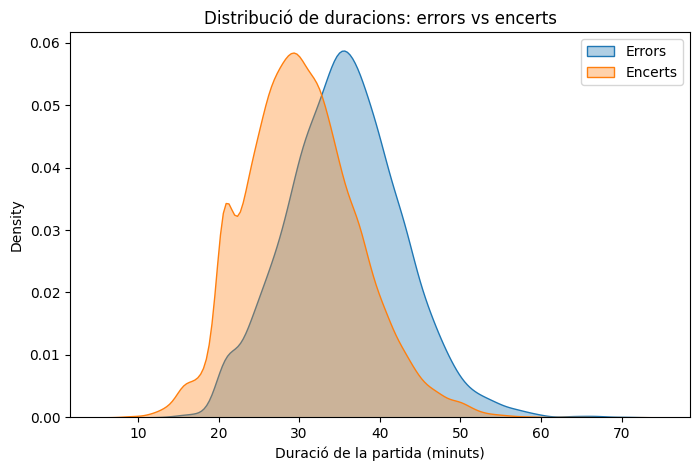

In [144]:
errors = errors.merge(
    df[["duration_min"]],
    left_index=True,
    right_index=True,
    how="left"
)

errors_wrong = errors[errors["correcte"] == 0]

# Gràfica de distribució
plt.figure(figsize=(8,5))
sns.kdeplot(errors_wrong["duration_min"], label="Errors", fill=True, alpha=0.35)
sns.kdeplot(errors[errors["correcte"]==1]["duration_min"], label="Encerts", fill=True, alpha=0.35)

plt.xlabel("Duració de la partida (minuts)")
plt.title("Distribució de duracions: errors vs encerts")
plt.legend()
plt.show()



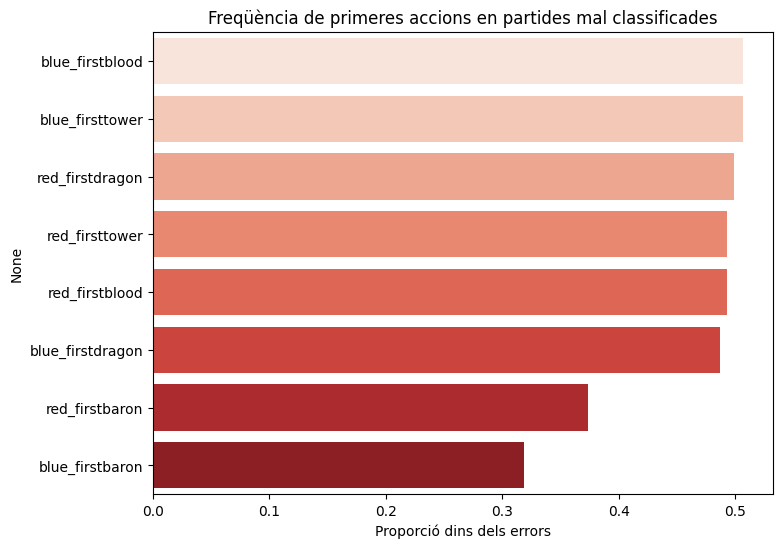

In [145]:
primers = [
    "blue_firsttower", "red_firsttower",
    "blue_firstbaron", "red_firstbaron",
    "blue_firstdragon", "red_firstdragon",
    "blue_firstblood", "red_firstblood",
]

error_means = errors_wrong[primers].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=error_means.values, y=error_means.index, palette="Reds")
plt.title("Freqüència de primeres accions en partides mal classificades")
plt.xlabel("Proporció dins dels errors")
plt.show()

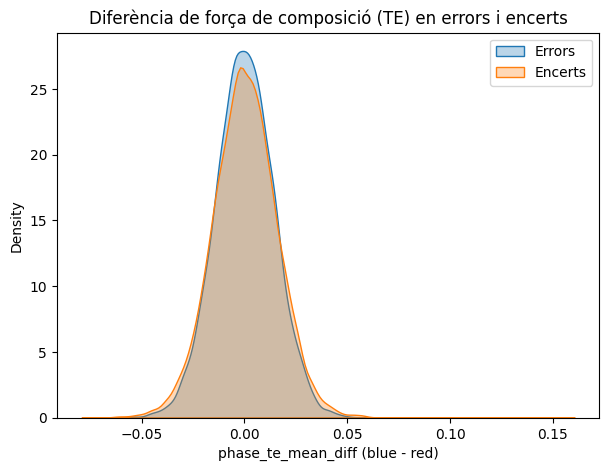

In [146]:
plt.figure(figsize=(7,5))
sns.kdeplot(errors_wrong["phase_te_mean_diff"], label="Errors", fill=True, alpha=0.3)
sns.kdeplot(errors[errors["correcte"]==1]["phase_te_mean_diff"], label="Encerts", fill=True, alpha=0.3)
plt.title("Diferència de força de composició (TE) en errors i encerts")
plt.xlabel("phase_te_mean_diff (blue - red)")
plt.legend()
plt.show()

## 11.3 Conclusions de l’anàlisi d’errors

L’anàlisi dels errors revela un patró clar: la major part de les prediccions incorrectes
es concentren en **partides que duren més temps**. La gràfica de distribució mostra que,
quan la partida s’allarga, la probabilitat d’error augmenta. Aquest comportament és
coherent amb diversos factors del joc i també amb les característiques del nostre model.

En primer lloc, una partida llarga sol indicar que **els dos equips estan molt igualats**.
En aquest escenari, petits detalls o decisions puntuals (que no estan reflectits al dataset)
poden alterar el resultat final. És un entorn naturalment més difícil de predir.

En segon lloc, tot i que hem dissenyat un sistema que **augmenta el pes de les composicions
de late game** quan la duració és elevada, les **primeres accions** continuen sent les
variables més influents del model. Això significa que, en partides llargues on les primeres
accions no reflecteixen bé el desenllaç final, és més probable que el model cometi errors.

Finalment, cal recordar que el dataset no conté informació de l’evolució interna de la partida.
No disposem de:
- avantatges d’or intermedis,
- kills per minut,
- evolució del map control,
- ni cap indicador de ritme.

El model ha de predir únicament amb:
- les primeres accions aconseguides,
- les característiques de composició (target encoding),
- i la força esperada segons la fase i la duració.

Tenint en compte aquestes limitacions, el fet que el model presenti un rendiment tan alt
confirma que les característiques creades capturen bona part de la dinàmica real del joc.
Els errors que observem són, en la seva majoria, casos on la partida és molt ajustada i el
resultat final depèn de factors que queden fora del nostre abast.


# 12. Conclusions finals del projecte

Aquest projecte ha tingut com a objectiu construir un model predictiu capaç
d’estimar quin equip guanyarà una partida de League of Legends utilitzant només
informació disponible en fases primerenques i mitjanes del joc. El repte principal
ha estat evitar les variables que reflecteixen l’estat final de la partida
(kills totals, or acumulat, torres destruïdes, inhibidors, etc.), perquè
proporcionen una informació gairebé directa del resultat i generen fuita
d’informació. En lloc d’això, s’ha buscat construir un model més honest,
explicatiu i interessant des del punt de vista analític.

## Model seleccionat i justificació
Després d’avaluar diversos models (Regressió Logística, Random Forest,
Gradient Boosting i XGBoost), s’ha escollit **XGBoost** com a model principal.
Aquest algorisme:

- gestiona bé relacions no lineals entre variables,
- captura interaccions complexes entre composició, fase i primeres accions,
- ofereix una capacitat de generalització robusta,
- i obté els millors resultats en totes les mètriques importants.

A més, s’ha aplicat validació creuada, divisió estratificada Train/Test,
i una cerca d’hiperparàmetres sistemàtica mitjançant `RandomizedSearchCV`,
tal com es treballa habitualment en un pipeline de classificació modern.

Els hiperparàmetres finals seleccionats aconsegueixen un
**ROC-AUC de 0.91** i un **F1-score superior al 0.82**, resultats excel·lents
tenint en compte les limitacions del dataset i el tipus de variables utilitzades.

## Un model diferent del que es veu habitualment
La majoria de projectes de predicció de LoL utilitzen variables com:
- torres totals,
- inhibidors totals,
- kills,
- or acumulat,
- avantatges de mid game,
- o la diferència econòmica al minut 20.

Aquestes variables ofereixen una precisió molt alta perquè ja contenen la informació
del resultat final. De fet, amb aquestes estadístiques és possible superar fàcilment
un **99% d’accuracy**, però això no proporciona valor analític real.

En aquest projecte s’ha triat una aproximació més profunda:
predir el resultat **abans que la partida estigui decidida** i amb variables que
reflecteixen coneixement estratègic, no simplement l’estat final.

## Creació de noves variables: valor afegit del projecte
El component transformador del treball ha estat la creació de variables pròpies,
basades en el coneixement del joc:

- **Target encoding global de composició**
- **Target encoding per fase de joc (early / mid / late)**
- **Estadístiques agregades de força per equip**
- **Interaccions entre duració i força de composició**
- **Multiplicador sigmoïdal de late game**
- **Diferències relatives entre equips**

Aquestes transformacions no formen part del dataset original i han estat creades
expressament per capturar conceptes reals del joc: escalat al late game, coherència
de la composició, punts forts en fase primerenca, i comportament teòric dels campions.
Aquesta construcció de variables és el que permet que el model funcioni realment bé
tot i no utilitzar dades finals de la partida.

## Eliminació d’elements massa determinants
En una primera versió, també es van utilitzar variables com
**first inhibitor (primer inhibidor)**. El model amb aquests atributs aconseguia
una accuracy del 90% i un ROC-AUC del 97%, resultats espectaculars.
Tanmateix, aquesta variable era massa determinant i, tot i no ser data leakage
estrictament, s’acostava massa al resultat final.

Per això s’ha decidit **eliminar aquesta informació** per construir un model
més equilibrat, més explicatiu i que realment mostri la capacitat predictiva
de les variables estratègiques creades durant el projecte.

## Anàlisi d’errors: un model coherent amb la naturalesa del joc
L’anàlisi dels errors mostra que el model falla sobretot en partides més llargues,
on:
- les primeres accions deixen de predir bé el resultat,
- les composicions de late no sempre arriben a escalar prou,
- i la igualtat entre equips augmenta la incertesa.

Aquests casos són naturals i difícils de predir fins i tot per jugadors experts.
El fet que la majoria d’errors se centrin en partides molt ajustades confirma que
el model està ben ajustat i que les variables creades capturen bona part de la
dinàmica real del joc.

## Resultat final del projecte
El model final aconsegueix un rendiment alt utilitzant només:
- primeres accions,
- força predictiva de la composició,
- i informació derivada de la duració i la fase del joc.

Amb aquest plantejament, hem construït un model:
- robust,
- explicatiu,
- coherent amb el funcionament real de LoL,
- i metodològicament alineat amb totes les tècniques apreses (validació creuada, split,
  tuning d’hiperparàmetres, enginyeria de variables, filtratge de dades i anàlisi d’errors).

En conjunt, el projecte demostra la capacitat de combinar coneixement del domini del joc
amb tècniques d’aprenentatge automàtic per obtenir un model predictiu útil i realista,
sense dependre d’estadístiques trivials o d’informació final de la partida.